# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [647]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [648]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
#%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Library to split the data into train and test
from sklearn.model_selection import train_test_split

# Libraries for different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Libraries to tune different models
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [649]:
visa_data=pd.read_csv('EasyVisa.csv')

#### Make a copy of dataset

In [650]:
data=visa_data.copy()

- *It's always a good practice to make a copy of datasets before doing any analysis.*

## Data Overview

  - Viewing the first and last few rows of the dataset
  - Checking the shape/datatypes etc of the dataset
  - Getting the statistical summary for the variables
  - Check for missing values
  - Check for duplicates

#### Displaying the first 5 rows of the dataset

In [651]:
visa_data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Displaying the last 5 rows of the dataset

In [652]:
visa_data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Displaying random 5 rows of the dataset

In [653]:
visa_data.sample(n=5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1788,EZYV1789,Asia,Master's,Y,N,347,2001,South,80534.26,Year,Y,Certified
24917,EZYV24918,North America,Bachelor's,N,N,1040,1818,Northeast,87797.34,Year,N,Denied
20214,EZYV20215,Europe,Master's,N,Y,370,1965,South,27124.33,Year,Y,Certified
12951,EZYV12952,Europe,Master's,Y,Y,1624,2003,Northeast,59082.94,Year,Y,Certified
3745,EZYV3746,Asia,Master's,Y,N,4048,2007,Midwest,137458.66,Year,Y,Certified


`sample(n=5) ` function will display any randomly selected 5 rows of the dataset here, instead of fetching first 5 or last 5 rows using head() and tail() functions respectively.

#### Checking the shape of dataset

In [654]:
visa_data.shape
print('The dataset EasyVisa contains', visa_data.shape[0], 'rows and', visa_data.shape[1],' columns')

The dataset EasyVisa contains 25480 rows and 12  columns


- *There are 25480 rows and 12 columns are present in the given dataset(EasyVisa).*

#### Checking the data types of the columns

In [655]:
visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observation:

- *There are `25480 rows and 12 columns` present in the given dataset.*
- *The dataset contains total of `12 columns` of datatypes `float(1)`,`Integer(2)` and `object(9)`.*
- *There are `3 columns` which are `numerical` in nature, the columns `no_of_employees, yr_of_estab and` are stored as `int` while `prevailing_wage` is stored as `float` as price requires decimal placing*.
  
- *The columns `case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, case_status` are catogorical data and stored as object(string).*
  
- *There are `25480 non-null` values in `all 12 columns` indicating `no missing values`.*

**basic functions to calculate/display value_counts, value_count percentwise for selected columns**

In [656]:
#basic functions to calculate/display value_counts, value_count percentwise for selected categorical columns
def basic_checks(df,cols_name):
    for cols in cols_name:
        cols_value_count=df[cols].value_counts()                 #calculate value_counts for selected categorical columns
        cols_value_perc= df[cols].value_counts(normalize=True)   #calculate value_counts percentwise for selected categorical columns

        #print the results
        print(50 * '-')
        print('Display value counts for column:',cols)          
        print(50 * '-')
        print(cols_value_count)
        print(50 * '-')
        print('Display value percentage for column:',cols)
        print(50 * '-')
        print(round(cols_value_perc*100),2)

In [657]:
cols_num=['no_of_employees','yr_of_estab','prevailing_wage']   #numerical columns
cols_cat=['continent','education_of_employee', 'has_job_experience', 'requires_job_training', 
          'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] #categorical columns
#cols_cat=list(visa_data.select_dtypes('object').columns)

In [658]:
basic_checks(visa_data,cols_cat)

--------------------------------------------------
Display value counts for column: continent
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
Display value percentage for column: continent
--------------------------------------------------
continent
Asia             66.0
Europe           15.0
North America    13.0
South America     3.0
Africa            2.0
Oceania           1.0
Name: proportion, dtype: float64 2
--------------------------------------------------
Display value counts for column: education_of_employee
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
Display value p

#### Statistical summary of the dataset

- *The `describe()` function will display the summary statistics of the numerical data. To view summary statistics of both numerical and categorical data we use describe(include='all')*.

In [659]:
visa_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation**

- *`case_id:` It's a unique id for each visa application. The dataset has information about `25480 applications` applied for visa.*

- *`continent:` There are 6 different continents `(Asia, Europe, North America, South America, Africa and Ocenia)` the employees are from. `Most` of the visa applications are `filed from Asia(66 %)`, followed by Europe(15 %) and North America(13 %).*

- *`education_of_employee`: There are 4 different categories (`Bachelor's , Master's , High School, Doctorate`) in employees educations. Most of the applications filed are for the employees who hold` Bachelor's` degree(40 %) followed by `Master's(38%), together contributing approx 80% `of applications*

- *`has_job_experience`: They are represented as `Y` or `N`. `58 percent` of the employees `has job experiences` at the time of filing indicating*

- *`requires_job_training`: They are represented as `Y` or `N`. Most of the employees do not requires job training `except 12%` of them.*

- *`no_of_employees`:There are few negative values for this column, which suggest data entry error as person count cannot have negative number and we have to fix the rows with negative values.*

   
- *`yr_of_estab` : `Around 50 percent of the companies` are established `before 1997`. There are few companies built as old as 1800. The latest year the company are establised are till 2016.*

- *`region_of_employment`: There are 5 different region `Northeast, South, West, Midwest and Island)` the employees have applied for job positions in US. Both Northeast and South region has received the maximum applications (28% each)*North followed by West(26%).*

- *`prevailing_wage`:On an average the `prevailing wage is around 74455`. There is huge difference in `minimum (2.1) and maximum (319210) wages`, which can be due to different units(yearly/Hourly/weekly or Monthly) they are measured in.*

- *`unit_of_wage`: The prevailing wage can be measured in `different units like Year/Hour/Week or Month `at the time of filing visa application. Around 22962 applications are filed for prevailing wage measured in `Year, acounting for 90 % of application`. Very few applications were filed when the wage is measured in Month(89 applications).*

- *`full_time_position`: `89 percent` of visa applications applied are for the full time positions.*
 
- *`case_status`: Out of `25480` applications `17018 are certified` while 8462 cases are `denied`.*

#### Check for duplicate data

In [660]:
visa_data.duplicated().sum()

0

- *There are `no duplicate data present` in the row.*

#### Check for null/missing value

In [661]:
visa_data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- *There are `no missing values present` in the given dataset*

**Checking for negative values in no_of_employees columns**

In [662]:
#Checking for negative values in no_of_employees columns
emp_count_neg=visa_data['no_of_employees']<0
visa_data[emp_count_neg]['no_of_employees'].unique()


array([-25, -11, -17, -26, -14], dtype=int64)

In [663]:
#converting to absolute value for this column using abs function
visa_data['no_of_employees']=abs(visa_data['no_of_employees'])

#Print the result, all columns are displayed as positive number now
visa_data['no_of_employees']

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [664]:
visa_data['case_id'].nunique()

25480

In [665]:
visa_data.drop(['case_id'],axis=1,inplace=True) #dropping case_id (unique values) as they are not useful in providing actionable insights

## Exploratory Data Analysis (EDA)

- *EDA is an important part of any project involving data. It is important to investigate and understand the data better before building a model with it.*


### Univariate Analysis

#### *lets do univariate analysis for below columns:*
1. case_id
2. continent
3. education_of_employee
4. has_job_experience
5. requires_job_training
6. no_of_employees
7. yr_of_estab
8. region_of_employment
9. prevailing_wage
10. unit_of_wage
11. full_time_position
12. case_status


- *We will not do analysis of `case_id` as it's `unique identifiers`.*

**Lets create a separate functions to plot histogram and boxplot for all the numericals columns and bar plot for categorical columns**

`Numerical columns list`  : 'no_of_employees','yr_of_estab','prevailing_wage'  <br>

`Categorical columns list`: 'case_id,'continent','education_of_employee', 'has_job_experience', 'requires_job_training', 
          'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'


In [666]:
#create a function to plot histogram and box plot for numericals columns 
def univariate_analysis_for_numCols(df,column_name, figsize=(15, 10),kde=True):
    """
    Boxplot and histogram combined

    df: dataframe
    column_name: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    
    """
       
        # creating the 2 subplots one for histogram and another for boxplot
          
    f, (ax_hist, ax_box) = plt.subplots(
        nrows=2,                                          # Number of rows of the subplot grid= 2(one for hist and another for box plot)
        sharex=True,                                      # both the subplots will share the same x-axis for same alignment
        gridspec_kw={"height_ratios": (0.75, 0.25)},      # height ratios to ensure histogram (more detailed) get more space compared to box plot. 
        figsize=figsize,
    )  
   
    #create a histplot on first subplot
    ax_hist.set_title(f'Histogram for {column_name}')
    sns.histplot(data = df , x = column_name , ax = ax_hist, color = 'blue' , kde = kde) 
    ax_hist.axvline(df[column_name].mean() , color = 'green', linestyle='--')
    ax_hist.axvline(df[column_name].median() , color = 'black')
   # plt.show()                  
    #create boxplot on second subplot
    sns.boxplot(data = df , x = column_name , ax = ax_box, color = 'orange',showmeans = True)
    ax_box.set_title(f'Boxplot for {column_name}')
    plt.show()   

**`no_of_employees`**

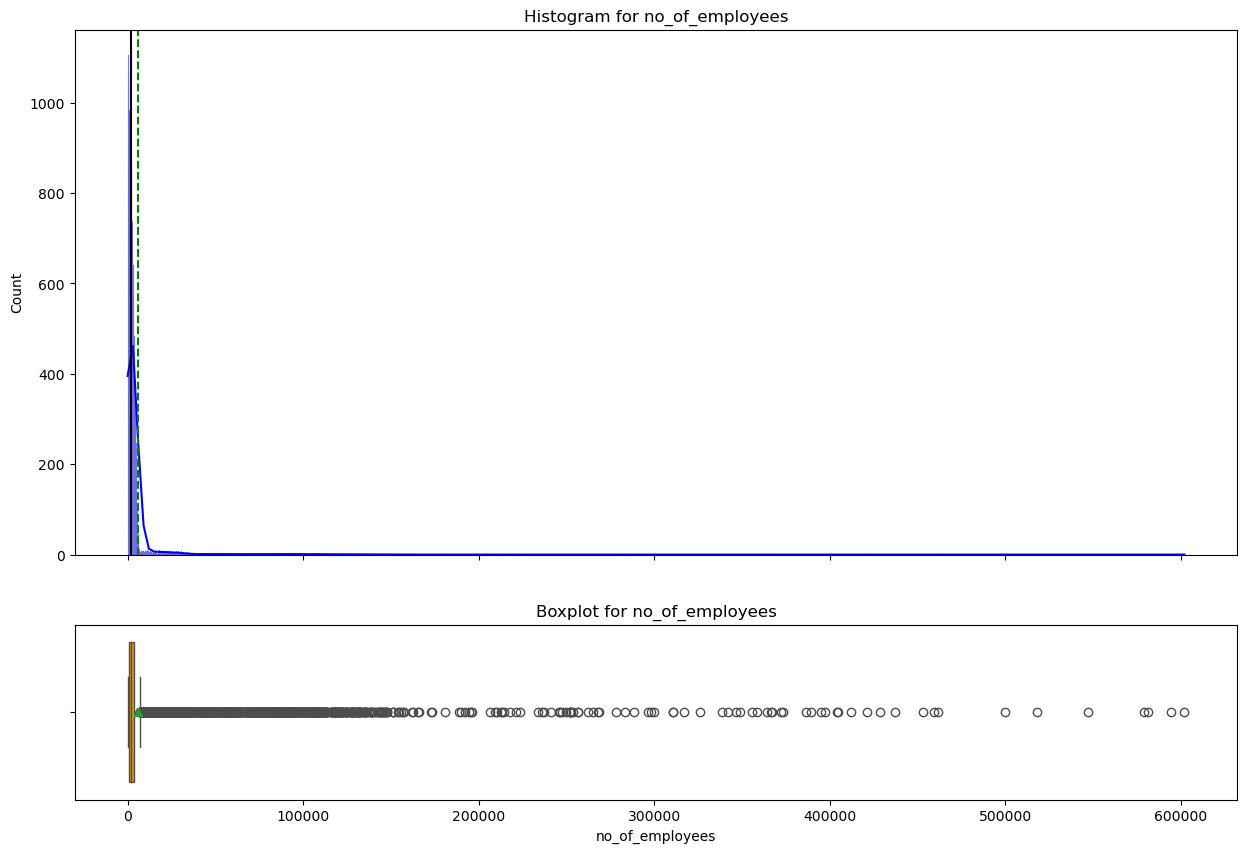

In [667]:
#call the function to plot Histogram and box plot for no_of_employees
univariate_analysis_for_numCols(visa_data,'no_of_employees', figsize=(15, 10))
#plt.show()

**Observation**

- *There are `lots of outliers present at higher end` making it heavily `positive right skewed`, suggesting different range of company sizes(small, midsize to large.*
- *75 percent of employees number are in the range within 3500*

**`prevailing_wage`**

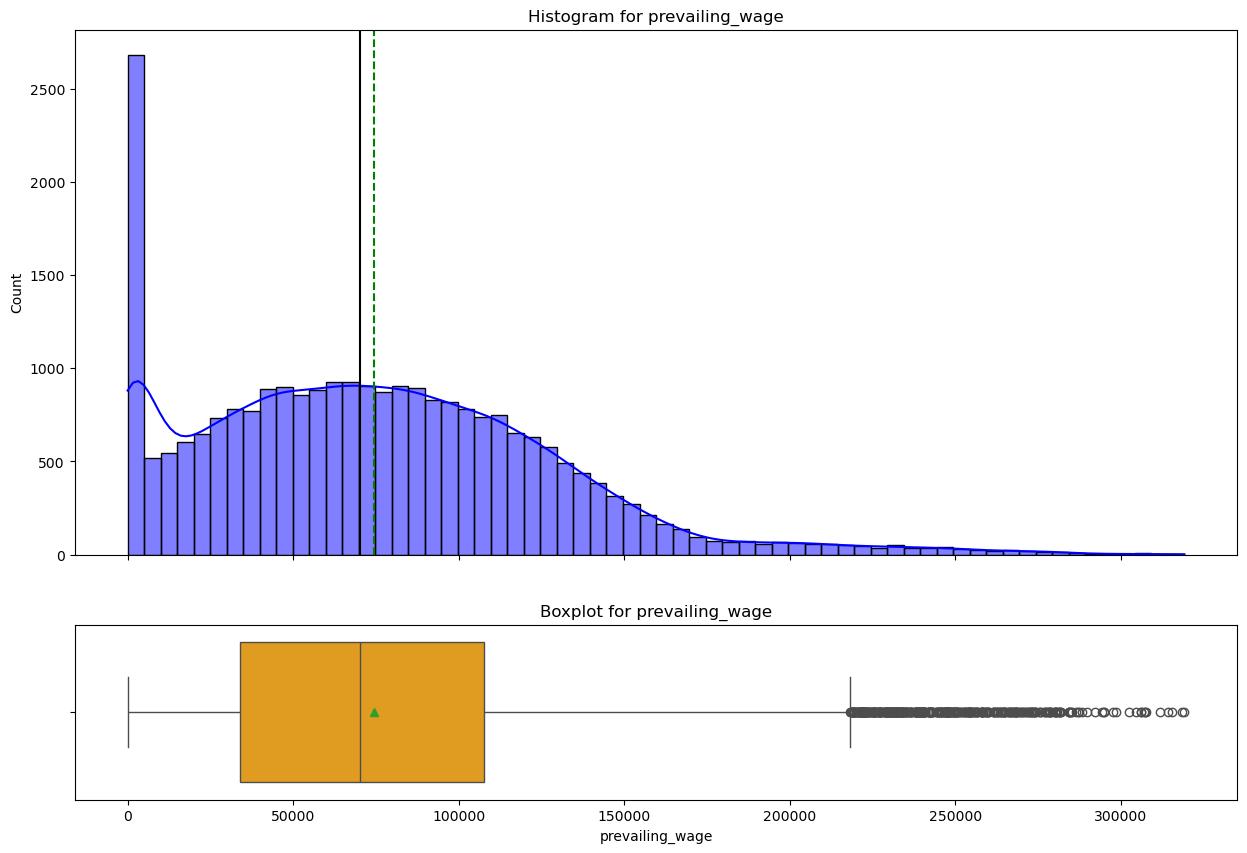

In [668]:
#call the function to plot Histogram and box plot for prevailing_wage
univariate_analysis_for_numCols(visa_data,'prevailing_wage', figsize=(15, 10))


**Observation**

- *There are `lots of outliers present at higher end` making it positive right skewed, indicating competitive salaries few employers are willing to pay for skilled labor.*
- *50 percent of middle data (IQR range) has prevailing wage between 35000 and 70000.*

**`yr_of_estab`**

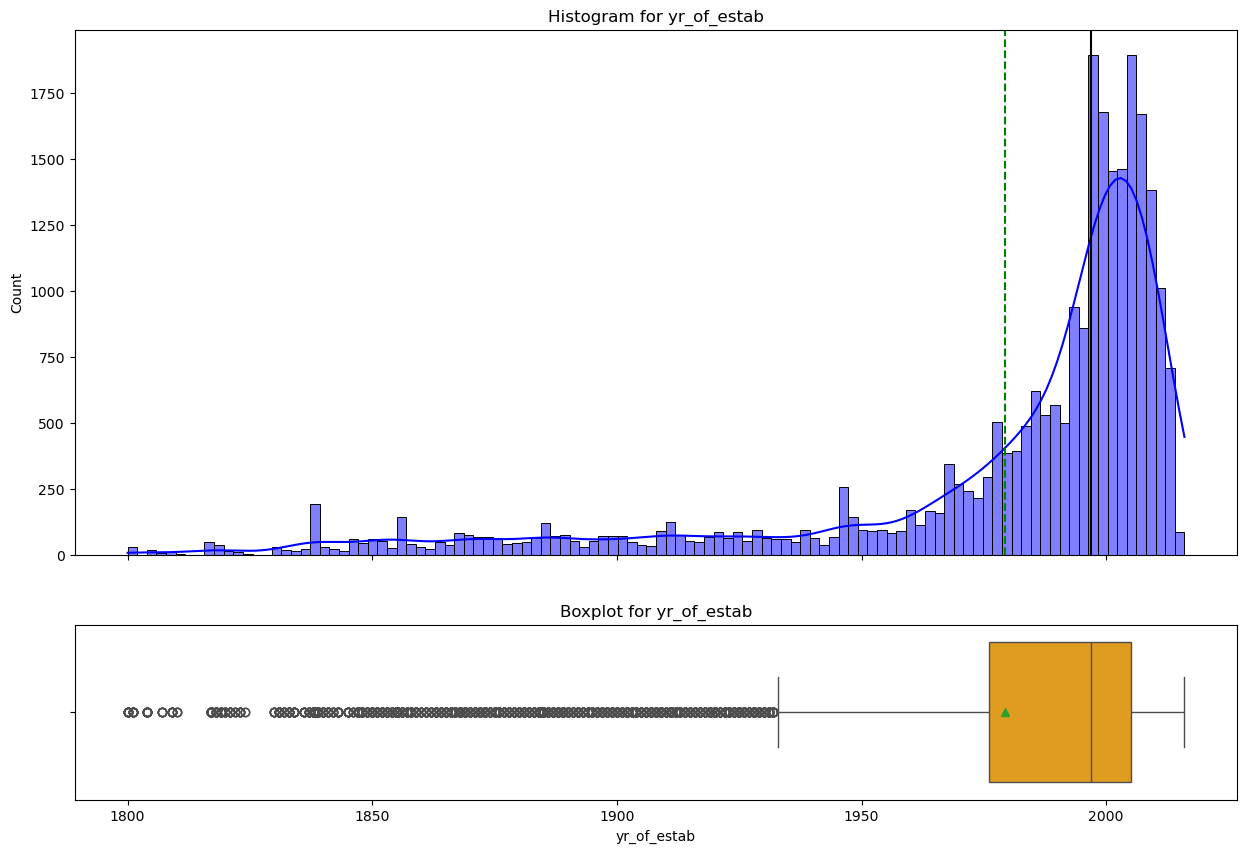

In [669]:
#call the function to plot Histogram and box plot for yr_of_estab
univariate_analysis_for_numCols(visa_data,'yr_of_estab', figsize=(15, 10),)

**Observation**

- *50 percent of middle data(IQR range) for the `companies` establisbed are in the range of years `1976 to 2005`.*
- *There are lots of `outliers present at the lower ends`, indicating many companies are very old and esbalished in early 1800.*
- *Mean is less than median value shifting the data to left`(left skewed).`*

**Function for plotting categorical column**

In [670]:
#create a function to plot bar plot for categorical columns 
def univariate_analysis_for_catgCols(df,column_name, perc=False, n=None):

    """
    df: dataframe 
    column_name: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = df.shape[0]   #total number of rows
    count = df[column_name].nunique()  # number of unique values in the column    
    
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    #create bar plot
    plt.xticks(rotation=90, fontsize=15)    
    plt.title(f'Bar graph for {column_name}')
    plt.xlabel(f'{column_name}')
    ax = sns.countplot(data = df,x = column_name,  order = df[column_name].value_counts().index[:n], hue = column_name)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    
    plt.show()  # show the plot

**`continent`**

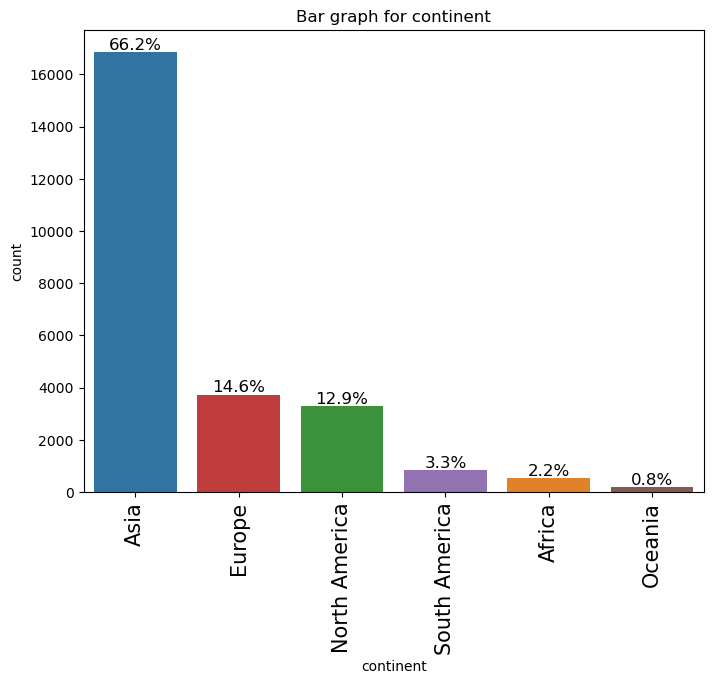

In [671]:
univariate_analysis_for_catgCols(visa_data,'continent', perc=True, n=None)

**Observation**

- *There are `6 different continents `(Asia, Europe, North America, South America, Africa and Ocenia) the employees are from.*
- *Most of the visa applications are filed from `Asia(66 %), followed by Europe(15 %) and North America(13 %)`.*
  

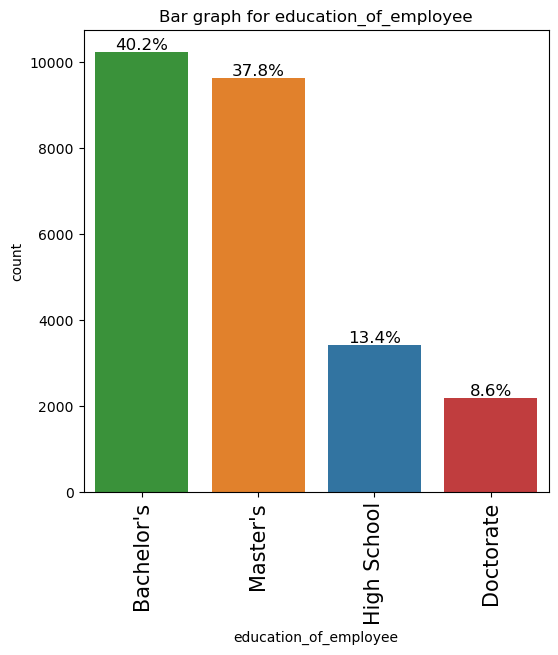

In [672]:
univariate_analysis_for_catgCols(visa_data,'education_of_employee', perc=True, n=None)

**Observation**

- *There are 4 different categories `(Bachelor's , Master's , High School, Doctorate)` in employees educations.*
  
- *Most of the applications filed are for the employees who `hold Bachelor's degree(40 %) followed by Master's(38%)`, together contributing approx 80% of applications.*
  

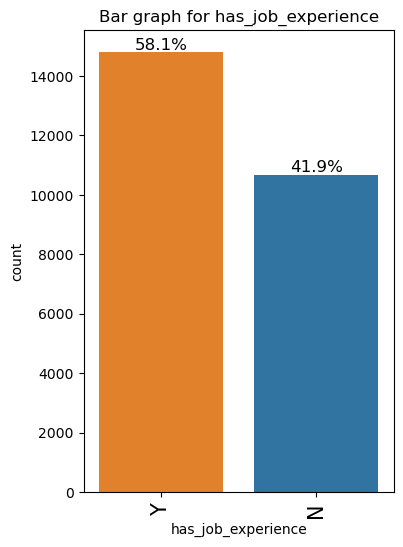

In [673]:
univariate_analysis_for_catgCols(visa_data,'has_job_experience', perc=True, n=None)

**Observation**

- *`58 percent` of the employees `has job experiences` at the time of filing while approx `42 percent` of employees have `no job experiences`*

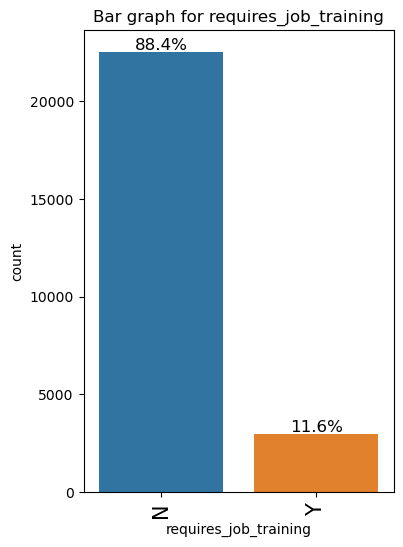

In [674]:
univariate_analysis_for_catgCols(visa_data,'requires_job_training', perc=True, n=None)

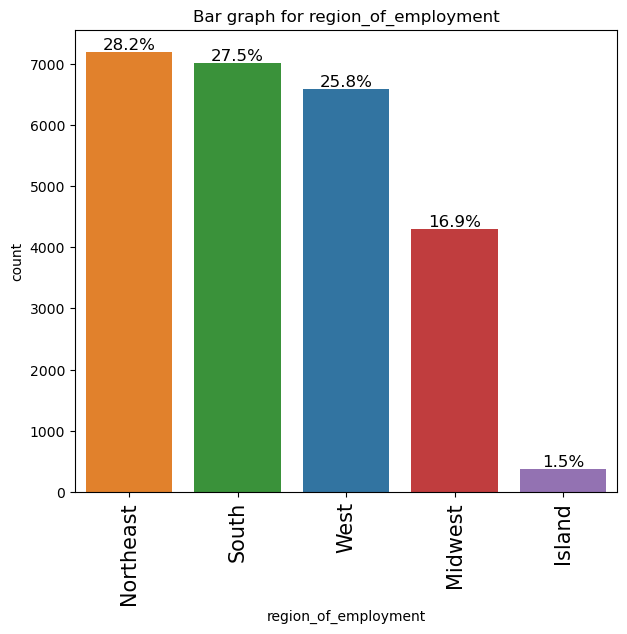

In [675]:
univariate_analysis_for_catgCols(visa_data,'region_of_employment', perc=True, n=None)

**Observation**
- *There are `5 different region Northeast, South, West, Midwest and Island)` the employees have applied for job positions in US.*
- *`Northeast (28%), South (27.5 %) and West(26 %) region` had receive the `maximum applications`, comprising around `82% of applications `suggesting more job opportunities are present in this region.*
- *`Island region` has a `least` job opportunities.*

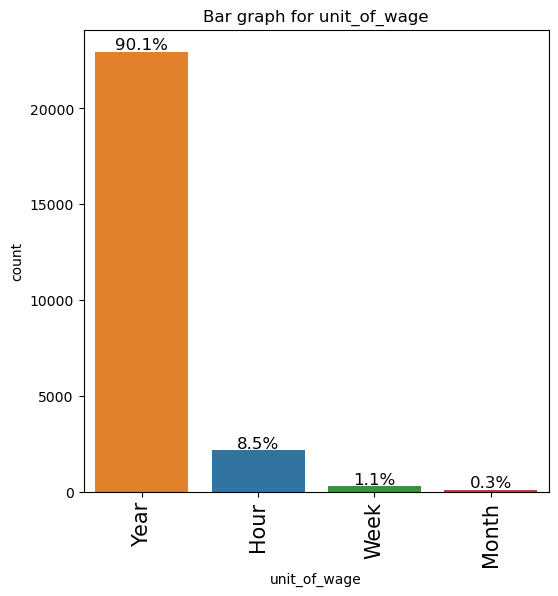

In [676]:
univariate_analysis_for_catgCols(visa_data,'unit_of_wage', perc=True, n=None)

**Observation**

- *The prevailing wage can be measured in `different units like Year/Hour/Week or Month` at the time of filing visa application.*
- *Around `22962 applications` are filed for prevailing wage `measured in Year`, acounting for `90 % of application`.*
- *Very `few applications` were filed when the wage is measured in `Month(0.3 %)`.*

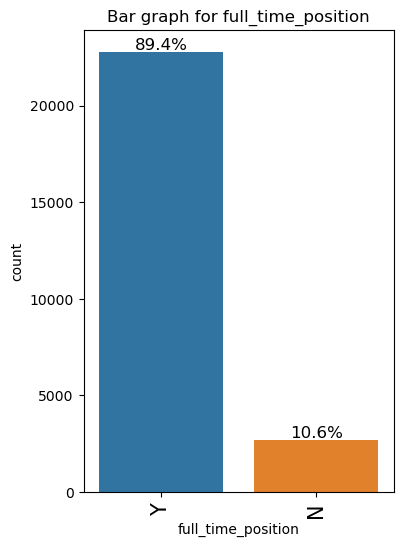

In [677]:
univariate_analysis_for_catgCols(visa_data,'full_time_position', perc=True, n=None)

**Observation**

- *Around `89 percent` of visa applications applied are for the `full time positions`*

**`case_status`**

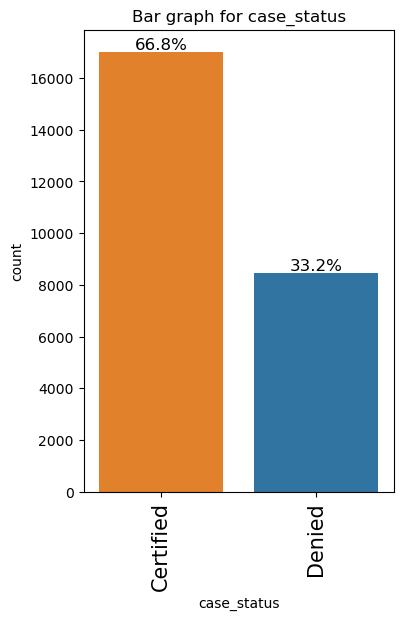

In [678]:
univariate_analysis_for_catgCols(visa_data,'case_status', perc=True, n=None)

**Observation**

- *Out of `25480 applications 17018 (approx 67%) are certified` while 8462 cases are denied.*

### Bivariate Analysis

#### Heat map to find correlation between numerical columns

In [679]:
num_col=list(visa_data.select_dtypes(include=np.number).columns)
visa_data_corr=visa_data[num_col].corr()

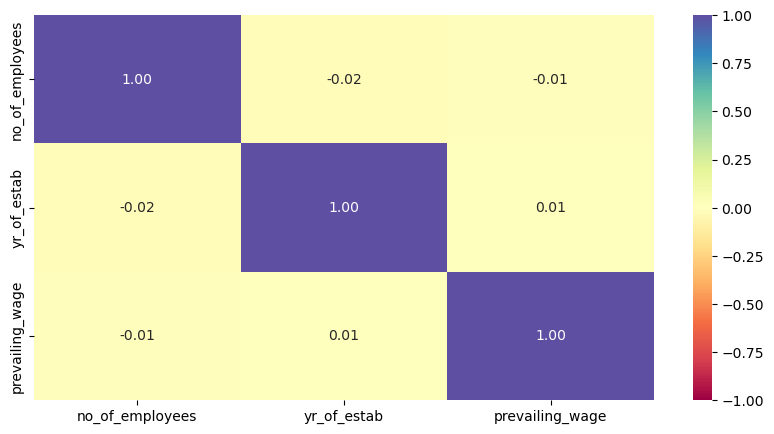

In [680]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=visa_data_corr, vmax=1, vmin=-1, cmap='Spectral',fmt=".2f", annot=True)
plt.show()

**Observation**

- *There is `not very strong correlation` between any variables.*
- *weak postive correlation between prevailing wage and year established.*
- *weak negative correlation between prevailing wage and no. of employees.*

**Creating common functions for Bivariate analysis.**

In [681]:
def bivariate_analysis_wrtTarget(df,predictor,target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title(f'Histogram of {predictor} wrt {target}=' + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
    )

    axs[0, 1].set_title(f'Histogram of {predictor} wrt {target}= '+ str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
    )

    #boxplot with outliers
    axs[1, 0].set_title(f'Boxplot:{target} vs {predictor}')
    sns.boxplot(data=df,x=target, y=predictor, ax=axs[1,0],palette = 'Spectral', hue=target ,showmeans=True)
    axs[1, 0].legend(['Certified (1)', 'Denied (0)'],title='Case Status')

    #boxplot without outliers
    axs[1, 1].set_title(f'Boxplot(without Outliers):{target} vs {predictor}')
    sns.boxplot(data=df,x=target, y=predictor, ax=axs[1,1],palette = 'Spectral', hue=target ,showmeans=True, showfliers=False)
    axs[1,1].legend([' Certified (1)', 'Denied (0)'],title='Case Status')
    plt.tight_layout() 
    plt.show()

In [682]:
#stacked barplot common fn wrt target
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique() #unique count of predictor
    sorter = df[target].value_counts().index[-1] #sort by booking status =1 (cancelled
    
    #create contigency table using pd.crosstab function
    #margins=True -> Adds row and column totals.
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(by=sorter, ascending=False )
    #print the contigency table count wise
    print(tab1)
    print('-' * 120)
    tab2 = pd.crosstab(df[predictor], df[target], normalize='index').sort_values( by=sorter, ascending=False)  #normalize='index' will give row-wise %)

    #print the contigency table percent wise  
    print('Percentwise:')
    print(tab2*100)
    print('-' * 120)


    #normalize='index'to plot the distribution percent wise i.e proportions 
    tab = pd.crosstab(df[predictor], df[target], normalize='index').sort_values(  by=sorter, ascending=False ) 
    
    #plot the stacked bar
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5),color=['green', 'Orange'])
    plt.legend([' Certified (1)', 'Denied (0)'],title='Case Status',loc="center", bbox_to_anchor=(0.75, 1.15))
    plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**`case_status vs education_of_employee`**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------
Percentwise:
case_status            Certified     Denied
education_of_employee                      
High School            34.035088  65.964912
Bachelor's             62.214188  37.785812
Master's               78.627777  21.372223
Doctorate              87.226277  12.773723
------------------------------------------------------------------------------------------------------------------------


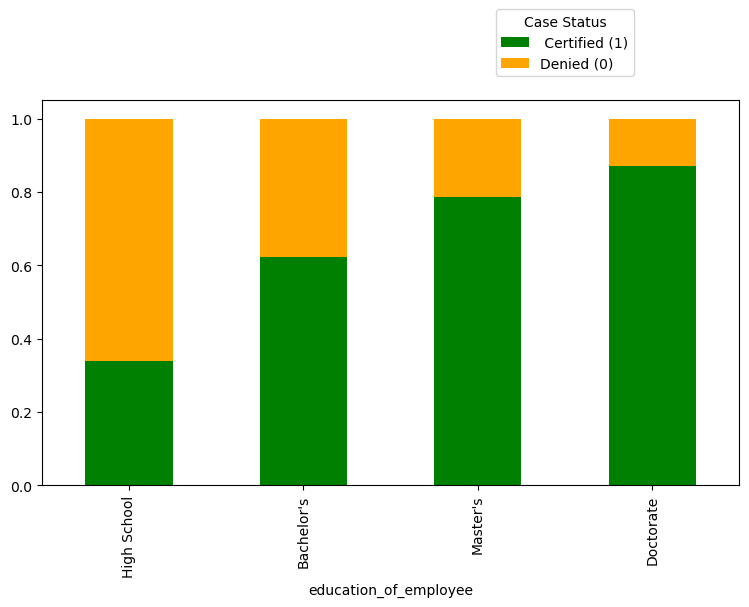

In [683]:
stacked_barplot(visa_data, "education_of_employee", "case_status")

**Q1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**


**Observation**

- *From the above plot we can say that `education plays an important role` in Visa certifcation.*
- *We can observe that the `case status are certified more` for the employees holding `higher education`.*
  
- *`Less` cases are `denied, approx 13 %`  for the employees who `hold Doctorate degree` , `21 percent for Master degree` and `38 % for Bachelor's degree`.*
  
- *Cases are `denied(66%) more than it's approved (34%) for the employees with High School degree`, suggesting demands are more in abroad for the people holding higher degrees*.
- *Higher the educations more chances of visa approval.*


**`Case status vs Continent**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------
Percentwise:
case_status    Certified     Denied
continent                          
South America  57.863850  42.136150
North America  61.877278  38.122722
Oceania        63.541667  36.458333
Asia           65.310480  34.689520
Africa         72.050817  27.949183
Europe         79.233655  20.766345
------------------------------------------------------------------------------------------------------------------------


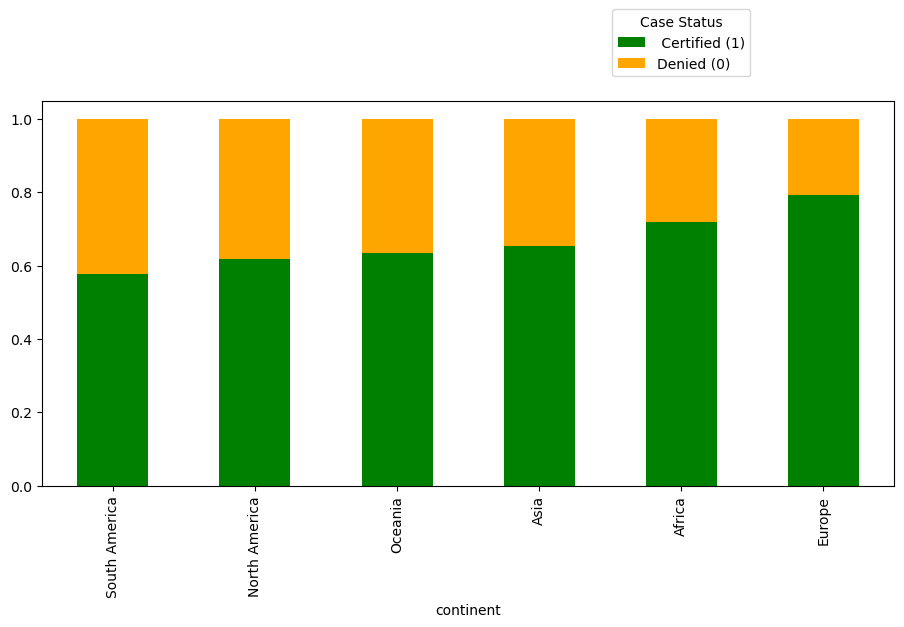

In [684]:
stacked_barplot(visa_data, "continent", "case_status")

**Q2: How does the visa status vary across different continents?**

**Observation**

- *Approval rating is `higher for Europe(79 %)` and `Africa (72 %)` .The high approval rating in Europe can be becasue of high education standard producing highly qualified skilled labor, good pay at home country less likely to overstay their visas*.
  
- *`Approval rate for all the continents` are `above 60 %` except South America, suggesting others factors like education, experiences might have influence on it.*
- *`Asia `has the `highest number of applicants`(16861 out of 25480 Visa applications).*              
- *Continent alone do not give enough information on Visa approval. For more clearer picture we need to take in account other factor too.*


**Lets check number of cases approved in each continent under all educations categories**

In [685]:
#create a new Dataframe to check case status for each education in each continent for which case is certified

#Create dataframe for above condition
df_continent_edu_certified_cnt = visa_data[visa_data['case_status'] == 'Certified'].groupby(['continent', 'education_of_employee'])['case_status'].count()
df_continent_edu_certified_cnt

#Total count of cases under each education group
total_counts = visa_data.groupby(['continent', 'education_of_employee'])['case_status'].count()

#Calculate and display the results in percentage
certified_percentage = (df_continent_edu_certified_cnt / total_counts) * 100
print('The percentage of certified case under each education categories and continents are:')
print(certified_percentage)


The percentage of certified case under each education categories and continents are:
continent      education_of_employee
Africa         Bachelor's               56.643357
               Doctorate                79.629630
               High School              34.848485
               Master's                 86.805556
Asia           Bachelor's               61.481585
               Doctorate                84.507042
               High School              29.519651
               Master's                 79.459877
Europe         Bachelor's               80.061586
               Doctorate                93.144208
               High School              33.061224
               Master's                 88.149499
North America  Bachelor's               52.326531
               Doctorate                80.232558
               High School              52.369077
               Master's                 69.531250
Oceania        Bachelor's               57.575758
               Doctorate    

In [686]:
#join the dataframe(condition and total case count) to plot the distribution
df_plot = total_counts.to_frame(name="Total visa cases").join(df_continent_edu_certified_cnt.to_frame(name="Certified cases")).fillna(0)

#create a new column to store the percentage for certified cases
df_plot['Certified_perc']=round((df_plot['Certified cases']/df_plot['Total visa cases']) *100,2) 
df_plot

Total visa cases  Certified cases  \
continent     education_of_employee                                      
Africa        Bachelor's                          143               81   
              Doctorate                            54               43   
              High School                          66               23   
              Master's                            288              250   
Asia          Bachelor's                         7168             4407   
              Doctorate                           923              780   
              High School                        2290              676   
              Master's                           6480             5149   
Europe        Bachelor's                         1299             1040   
              Doctorate                           846              788   
              High School                         490              162   
              Master's                           1097              967   
North America Bachelor's                         1225              641   
              Doctorate                           258              207   
              High School                         401              210   
              Master's                           1408              979   
Oceania       Bachelor's                           66               38   
              Doctorate                            22               19   
              High School                          36               19   
              Master's                             68               46   
South America Bachelor's                          333              160   
              Doctorate                            89               75   
              High School                         137               74   
              Master's                            293              184   

                                     Certified_perc  
continent     education_of_employee                  
Africa        Bachelor's                      56.64  
              Doctorate                       79.63  
              High School                     34.85  
              Master's                        86.81  
Asia          Bachelor's                      61.48  
              Doctorate                       84.51  
              High School                     29.52  
              Master's                        79.46  
Europe        Bachelor's                      80.06  
              Doctorate                       93.14  
              High School                     33.06  
              Master's                        88.15  
North America Bachelor's                      52.33  
              Doctorate                       80.23  
              High School                     52.37  
              Master's                        69.53  
Oceania       Bachelor's                      57.58  
              Doctorate                       86.36  
              High School                     52.78  
              Master's                        67.65  
South America Bachelor's                      48.05  
              Doctorate                       84.27  
              High School                     54.01  
              Master's                        62.80

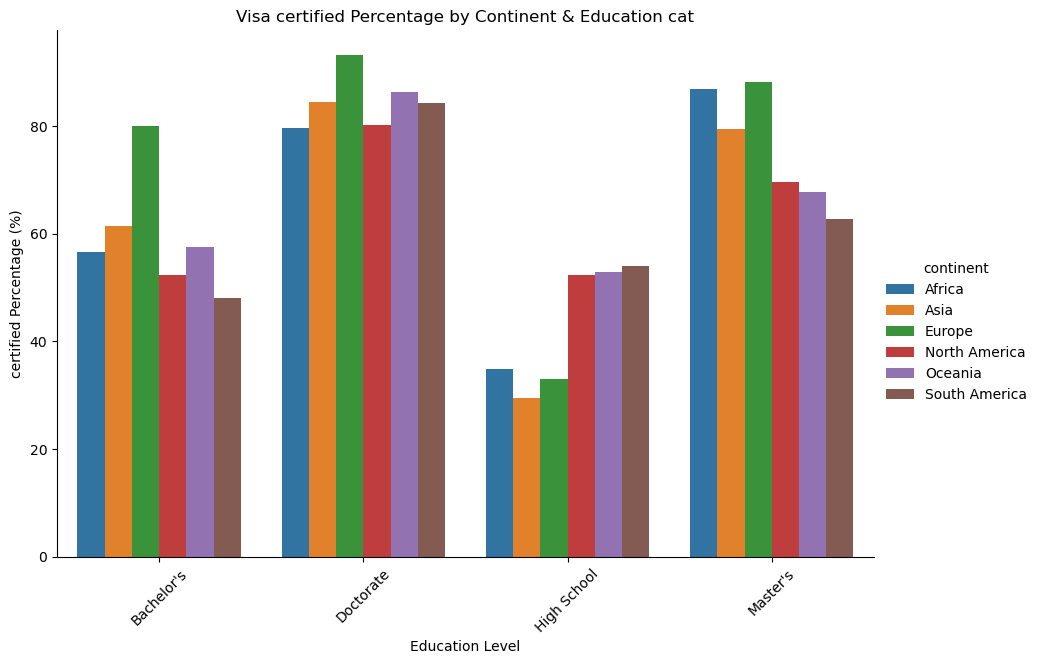

In [687]:
#plot the distribution
sns.catplot(x="education_of_employee", y="Certified_perc", hue="continent", kind="bar", data=df_plot, height=6, aspect=1.5)
plt.xlabel("Education Level")
plt.ylabel("certified Percentage (%)")
plt.title("Visa certified Percentage by Continent & Education cat")
plt.xticks(rotation=45)
plt.show()

**Observation**

- *`Approval rate` for `all education degree` are `high(more than 80 %)` for `Europe` except for High school.*
- *Approval rates for `Bachelor degree is less than 60 percent` for all continent `except Asia(62 % and Europe(80 %).`*
- *Approval rate for `Doctorate are high(more than or equal to 80% )`for all continents.*
- *`Approval rates for Master's `are `less (63-68 % approx)` in `South & North America and Oceania.`*
- *Approval rates for `High schools graduate are more in Oceania,South & North America`  when compared to other 3 continents, suggesting applications for low skilled jobs.*
  

**`Job Experience vs Case status`**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------
Percentwise:
case_status         Certified     Denied
has_job_experience                      
N                   56.134108  43.865892
Y                   74.476422  25.523578
------------------------------------------------------------------------------------------------------------------------


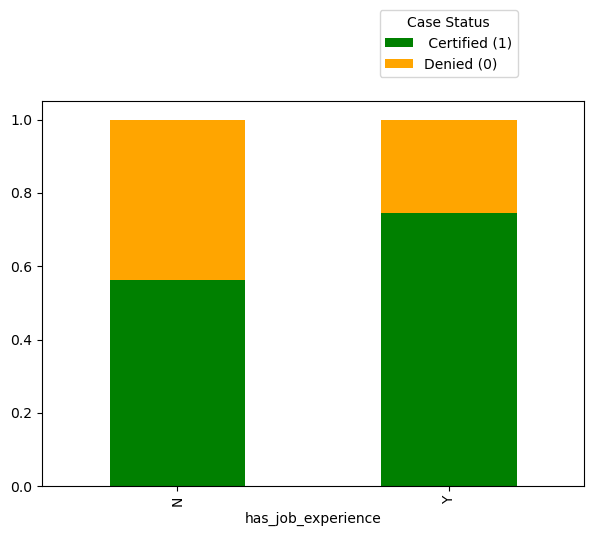

In [688]:
stacked_barplot(visa_data, "has_job_experience", "case_status")

**Q3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

**Observation**

- *From the above plot we can say that `Work experience matter and influence visa status`. i.e chances of visa getting approved is higher if employees have prior work experiences,suggesting companies in USA are looking for skilled workers*.
  
- *`74 percent` of cases are `approved for employees having prior work experienced `while for `non-experienced `employee the approval rating is `only 56 %` .*


**`requires_job_training vs Case status`**

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------
Percentwise:
case_status            Certified     Denied
requires_job_training                      
N                      66.645949  33.354051
Y                      67.884941  32.115059
------------------------------------------------------------------------------------------------------------------------


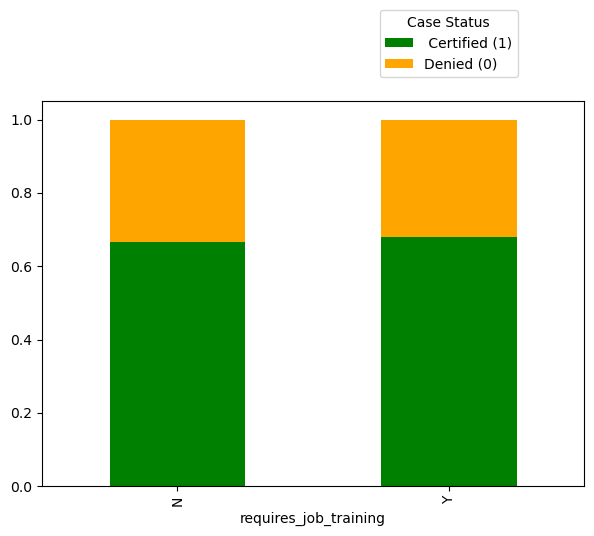

In [689]:
stacked_barplot(visa_data, "requires_job_training", "case_status")

**Observation:**

- *The `visa approval rate` for the `employees who required training or not are almost same (67% approx)`, but number of applicants are more in case of employees who do not requires job training.*

**`region_of_employment vs Case status`**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------
Percentwise:
case_status           Certified     Denied
region_of_employment                      
Island                60.266667  39.733333
West                  62.253265  37.746735
Northeast             62.904795  37.095205
South                 70.015676  29.984324
Midwest               75.528210  24.471790
------------------------------------------------------------------------------------------------------------------------


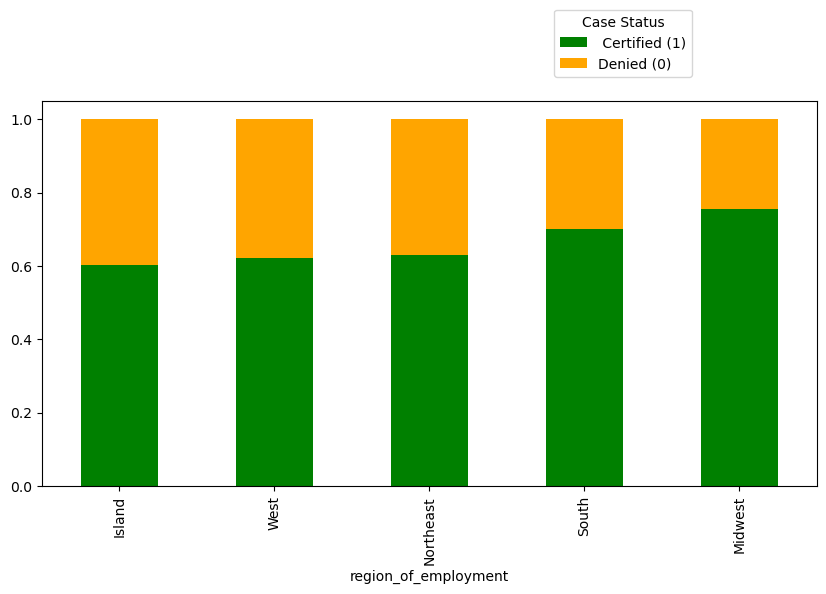

In [690]:
stacked_barplot(visa_data, "region_of_employment", "case_status")

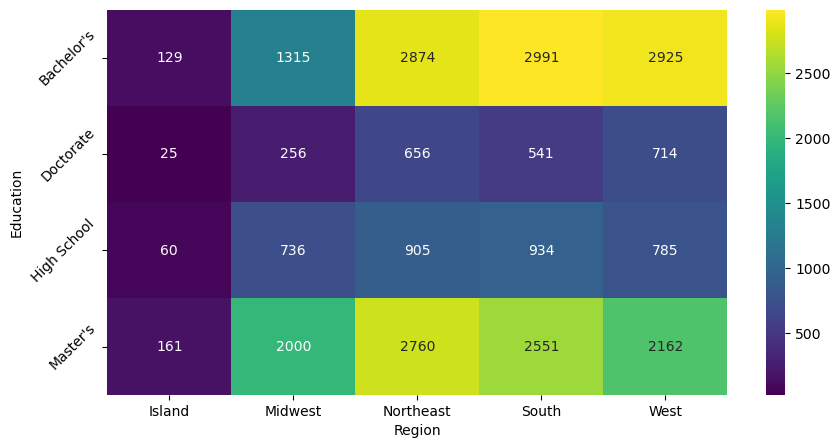

In [691]:
## Code to plot heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(visa_data['education_of_employee'],visa_data['region_of_employment']),
    annot=True,
    fmt='g',
    cmap='viridis'
) 

plt.ylabel('Education')
plt.yticks(rotation=45)
plt.xlabel('Region')
plt.show()

**Observation**

- *`Northeast(2760) `region has `more Master's applicants followed by South(2551) and West(2162),` suggesting job requirements are more for highly qualified skilled labor*
- *`Bachelor's applicants are more in South(2991) and West(2925)`, followed by NorthEast region(2874).*
- *`Doctrates applicants are more common in West` followed by NorthEast region.*



**Q4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**



case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------
Percentwise:
case_status   Certified     Denied
unit_of_wage                      
Hour          34.631433  65.368567
Month         61.797753  38.202247
Week          62.132353  37.867647
Year          69.885027  30.114973
------------------------------------------------------------------------------------------------------------------------


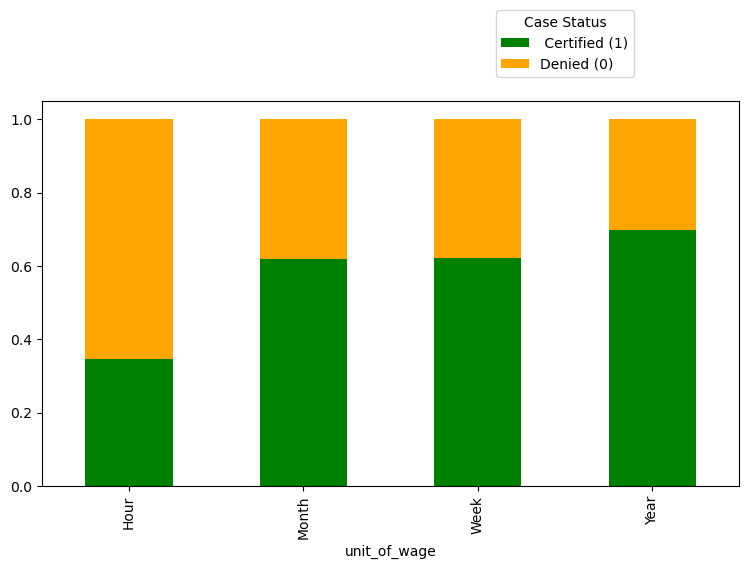

In [692]:
#Code to find distribution of prevailing_wage and case status
stacked_barplot(visa_data,'unit_of_wage','case_status')

**Observation**

- *`Cases approval is highest when unit of wage is yearly,` indicating skilled workers for full-time positions or salaried workers*.
  
- *`Denial is highest` for `hourly paid `workers, indicating temporary, contract based jobs or seasonal workers.*
  
- *Most of the applications(22962 cases) are filed for yearly wages.*
  

**Q5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

Let's analyze the data and see if the visa status changes with the prevailing wage

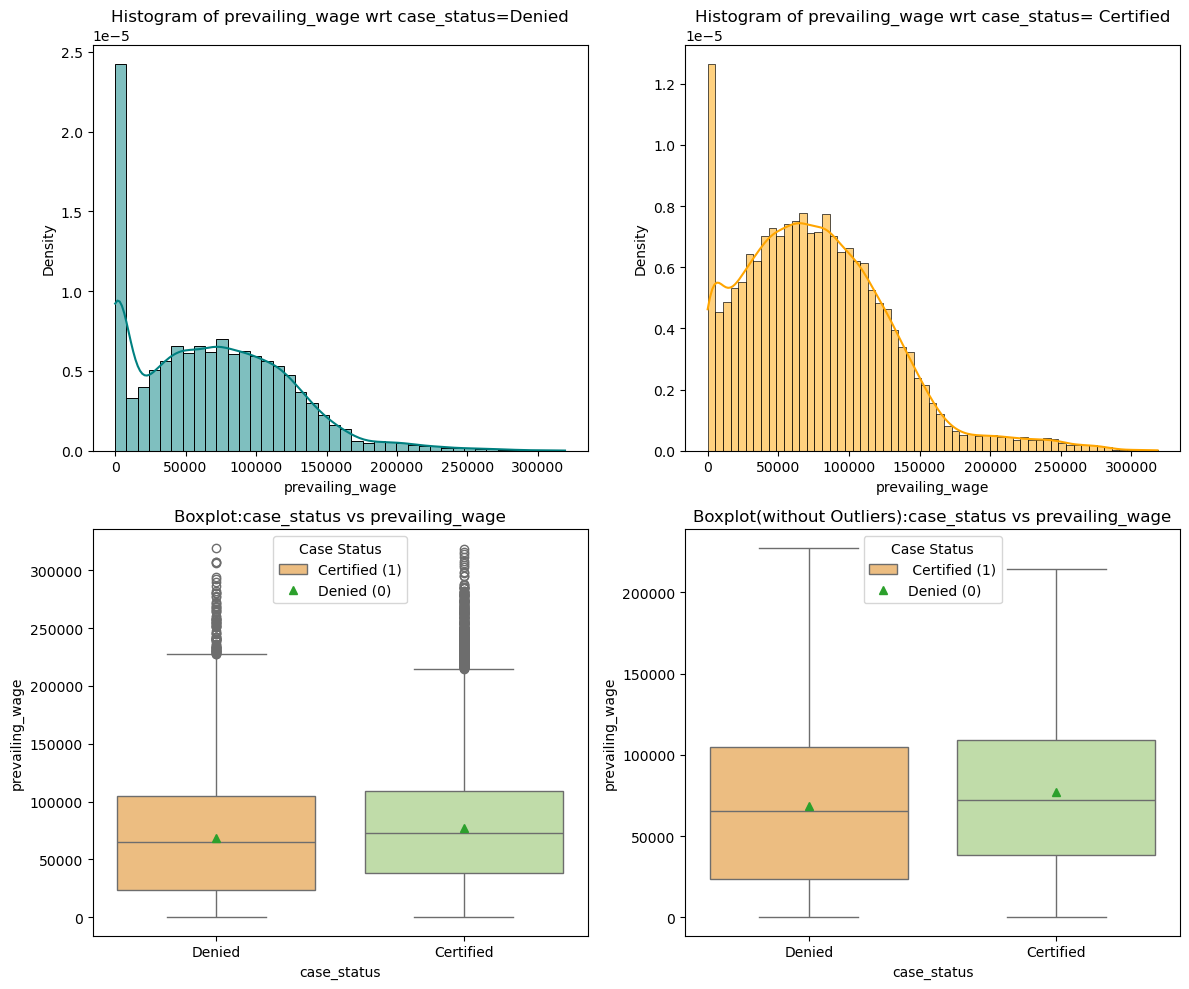

In [693]:
#Code to find distribution of prevailing_wage and case status
bivariate_analysis_wrtTarget(visa_data,'prevailing_wage','case_status')

**Observation**

- *From the above distribution, we `do not see much difference in prevailing wage value in certified or denied `case.They are almost same, with certified case have slightly higher value.*

**Checking if the prevailing wage is similar across all the regions of the US**

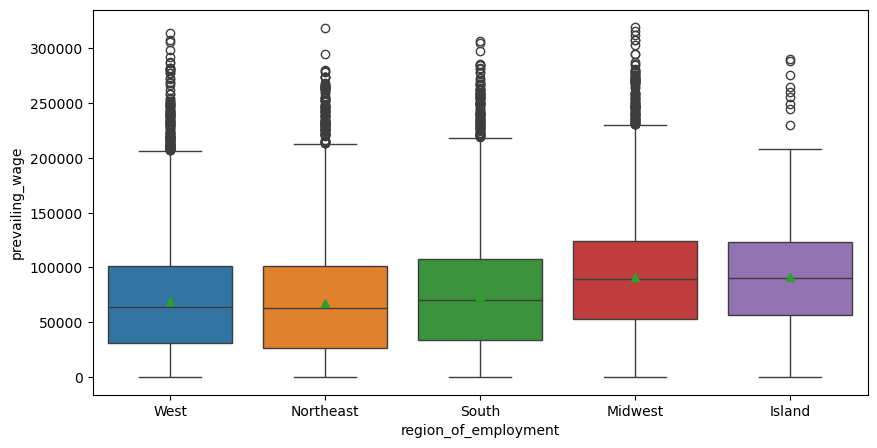

In [694]:
#Code to create boxplot for region of employment and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(data=visa_data, x='region_of_employment', y='prevailing_wage', hue='region_of_employment', showmeans=True)
plt.show()

**Observation**

- *`Mean and Median` of prevailing wage `are similar in range(65000-72000)` for `West,Northeast and South`.They are `slightly higher` for Midwest and Island*
  
- *`Outliers` are `present at higher end` for all regions.*

- *Mean and Median values are almost same for all region and `50 percent of middle data` for prevailing wage lies in `25000-120000` range.*

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

- *As observed earlier there are no missing values present, so no treatment is required.*

### Feature engineering

- *Feature engineering is not required also we have already `dropped case_id `which is `not essential here`.*

### Outlier Check



#### Let's check for outliers in the data.

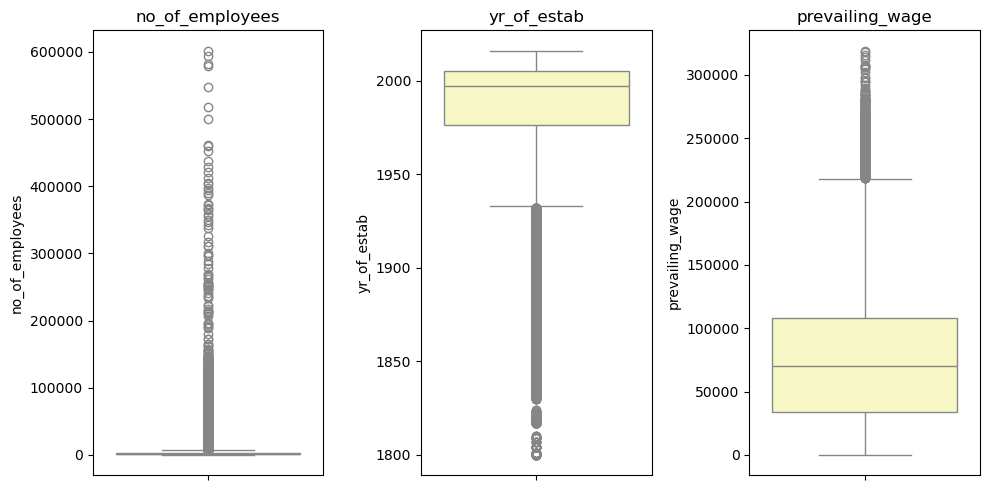

In [695]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))

for i, variable in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(visa_data[variable], palette='Spectral',whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


**Observations**

- *There are `quite a few outliers present` for all the columns in the given dataset.*
- *However, we will not treat them as they are proper values.*

## EDA

- *It is a good idea to explore the data once again after manipulating it.*

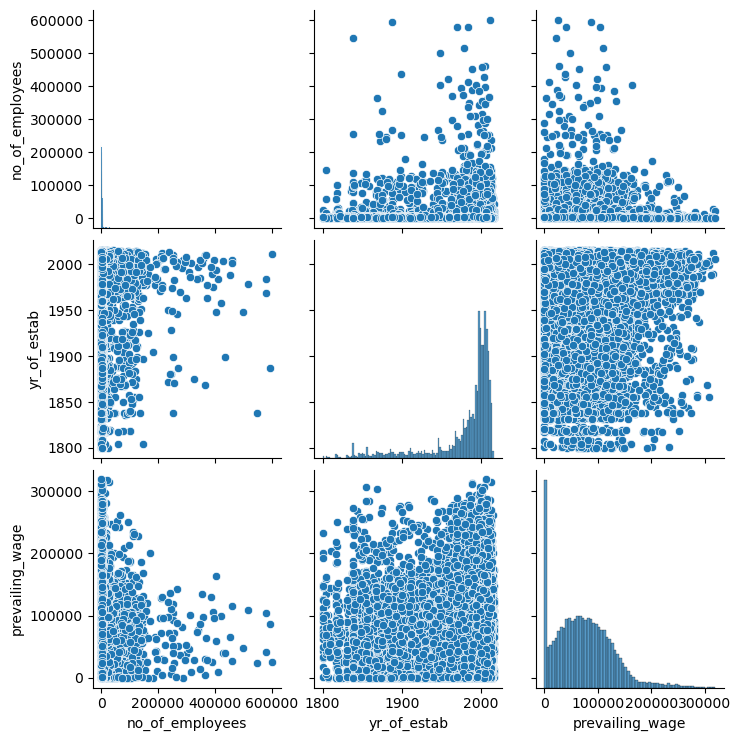

In [696]:
# Lets plot pairplot to understand the relationships between the all the numeric variables
sns.pairplot(data = visa_data);
plt.show()

In [697]:
#check for missing data and datatype information
visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


- *Data seems to be okay, since we have not done much changes to dataset except for case_id is dropped from dataset.*
  
- *There are `no missing values` present in all the columns.* 

### Data Preparation for modeling

- *The main objective of building a model is to `predict which visa will be certified` and identify factors that significantly influence it.*
- *There are few checks we need to perform before proceeding with model building.*  
- *`dropping the irrelevant columns` and `creating dummy variables` for categorical columns.*
- *Identify the `dependent and independent` variables.*
- *`splitting the dataset into train and test` to be able to evaluate the model that we build on the train data.*

#### **Step 1:** Making copy before dropping the attributes which are not necessary for model building.

In [698]:
#make a copy
v_data=visa_data.copy()

#### **Step 2:**  Dropping the irrelevant columns and encode categorical data (case_status to 0 or 1)

In [699]:
#Encode case_status to `0(denied) or 1(certified) using lambda fn.
v_data['case_status'] = v_data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)


- *Since we have already removed the irrelevant columns, we will skip this step.*
- *`Encode categorical data` -case_status to `0(denied) or 1(certified)`.*

#### **Step 3:** Identify the dependent(Target) and independent(Predictors) variables

In [700]:
#predictor (independent variables)
X=v_data.drop(['case_status'],axis=1)

#target varaible
y=v_data['case_status']


#### **Step 4**: Create dummy variables

In [701]:
#create dummies for categorical columns
X=pd.get_dummies(X,drop_first=True)

#### **Step 5 :** Changing the datatype to float/int in X dataframe

- *We can observe the datatype for all the dummies variable has changed to bool. We usually get datatype error while running the model as the machine works on numerical data.*
- *converting all the bool datatype to either int/float.*

In [702]:
X=X.astype(float)
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  float64
 1   yr_of_estab                        25480 non-null  float64
 2   prevailing_wage                    25480 non-null  float64
 3   continent_Asia                     25480 non-null  float64
 4   continent_Europe                   25480 non-null  float64
 5   continent_North America            25480 non-null  float64
 6   continent_Oceania                  25480 non-null  float64
 7   continent_South America            25480 non-null  float64
 8   education_of_employee_Doctorate    25480 non-null  float64
 9   education_of_employee_High School  25480 non-null  float64
 10  education_of_employee_Master's     25480 non-null  float64
 11  has_job_experience_Y               25480 non-null  flo

#### **Step 6:** Split the dataset into train and test

In [703]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [704]:
print('Shape of Training set : ', X_train.shape)
print('Shape of test set : ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


- *Train and Test set is created with  `ratio 70:30 `and random_state = 1.*
- *We can also observed that the `class is imbalanced`(class 0=67% and class 1=33%) in both train and test set) and for result to be not biased we have to balanced the class weights.*

**Note**
- *Since the decision tree is a `non-linear model,` it is `not affected by multicollinearity.`*
- *`The stratify argument` maintains the original distribution of classes in the target variable while splitting the data into train and test sets.*
- *It is always a good practice to set `drop_first = True` in all the models. However, in the case of non-linear models like decision trees, this step is not mandatory.*

## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.`(FN) (Type 2 error)` .
   - Occurs when the model incorrectly predicts a negative outcome when it should be positive.<br>
   
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.`(FP) (Type 1 error)`.
    - Occurs when the model incorrectly predicts a positive outcome when it should be negative. <br>

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will `use balanced class weights` so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The `model_performance_classification_sklearn function` will be used to check the model performance of models.
* The `confusion_matrix_sklearn function` will be used to plot the confusion matrix.

**Function to check performance of a classification model built using sklearn**

In [705]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    
    # to compute Accuracy
    acc = accuracy_score(target, pred) 

    # to compute Recall
    recall = recall_score(target, pred)  

    # to compute Precision
    precision = precision_score(target, pred)  

    # to compute F1-score
    f1 = f1_score(target, pred)  
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

**function to plot the confusion_matrix of a classification model**

In [706]:
#defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

## Decision Tree - Model Building and Hyperparameter Tuning

In [707]:
# fit the decision tree on train data
d_tree= DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

**Confusion matrix for default**( i.e. the tree grows until all leaves are pure)

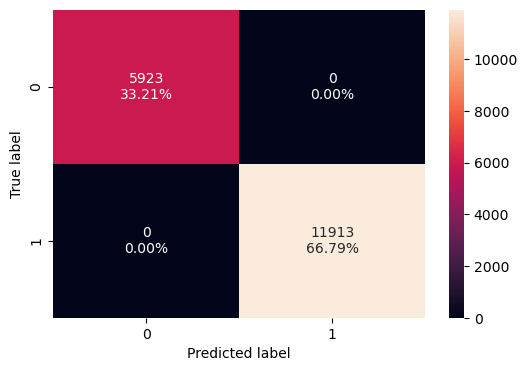

In [708]:
# create confusion matrix for train data
confusion_matrix_sklearn(d_tree,X_train,y_train) 

In [709]:
#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n")
d_tree_model_train_perf

Training performance:



,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

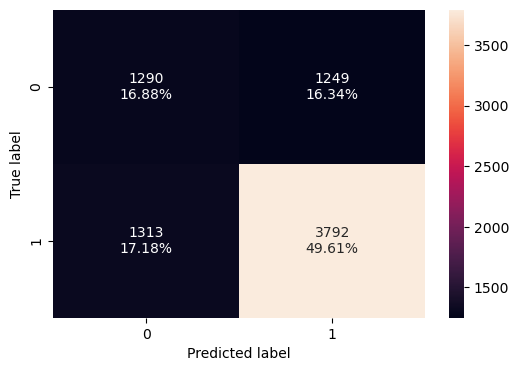

In [710]:
# create confusion matrix for test data
confusion_matrix_sklearn(d_tree, X_test,y_test) 

In [711]:
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n")
d_tree_model_test_perf

Testing performance:



,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


**Observation**

- *We can see from above results the `model is performing perfectly on training set` i.e. all metric(Accuracy,recall,Precision and f1-score) are `equal to 1,` classifying each data points correctly.*
  
- *We can also observe a `huge difference` in performance of model on `training and test set`,suggesting that the model is `suffering from overfiiting`.*
  
- *A `complex tree with no restrictions` applied, will learn all the patterns in the training set capturing  all the information and noise. They will perform very well on training set but fail to perform well on test set because of `overfiiting` issue.*
  
- *Therefore to `improve performance of the model` on test let's try using `hyperparameter tuning`.*


#### **Sample parameter grids for hypertuning different models**



-  Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- `For Gradient Boosting:`

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- `For Adaboost:`

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- `For Bagging Classifier:`

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- `For Decision Trees:`

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

-` For XGBoost:`

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Hyperparameter Tuning - Decision Tree

In [712]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = { 
    "max_depth": np.arange(10, 20,5),  #Controls the maximum depth of the tree and prevents overfitting values used  here[10,15] intv of 5
    "min_samples_leaf": [3, 5],         #Minimum number of samples required in a leaf node(i.e.enough data points.)
    "max_leaf_nodes": [2, 3, 5],        #Limits the number of leaf nodes. 
    "min_impurity_decrease": [0.0001, 0.001],  #A split is made only if the decrease in impurity is at least this value.
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator,parameters,scoring=scorer,cv=5,n_jobs=-1) #5-fold cross-validation is used to evaluate each parameter combination
                                                                        #n_jobs=-1: Uses all CPU cores for parallel processing to speed up the search 
                                                                        #Uses F1-score as the metric to evaluate the model.
                                                                        
# Code to fit the grid_obj on the train data 
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_        # Retrieves the best model

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking performance on training set- using grid search(estimator)

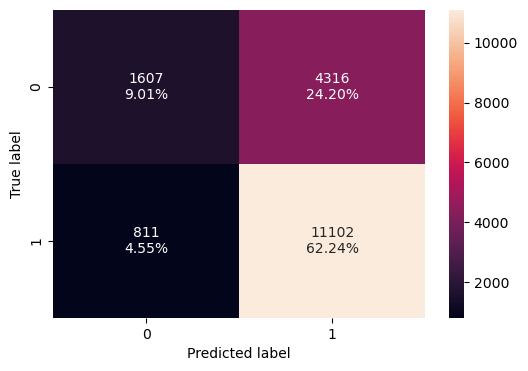

In [713]:
# create confusion matrix for train data
confusion_matrix_sklearn(dtree_estimator, X_train, y_train) 

In [714]:
# check performance on train set
decision_tree_tune_perf_train = model_performance_classification_sklearn(dtree_estimator, X_train, y_train) 
print("Training performance:\n")
decision_tree_tune_perf_train

Training performance:



,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


#### Checking performance on test set

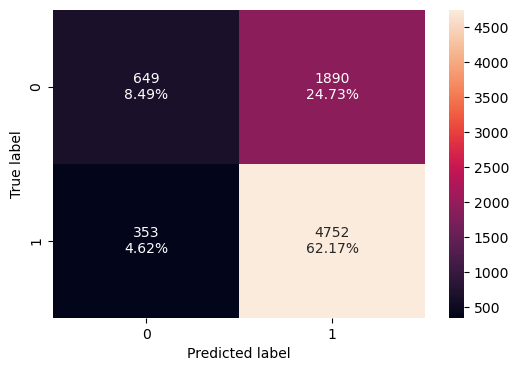

In [715]:
# create confusion matrix for test data
confusion_matrix_sklearn(dtree_estimator,X_test,y_test) 

In [716]:
# check performance on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n")
decision_tree_tune_perf_test

Testing performance:



,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


**Observation**

- *we can observe that the performance of both test and train data is almost same and model is not suffering from overfitting*
- *The `f1_score and recall` of the model are `~0.81 `and  `~0.93`respectively on both test and train data which is good. Lets try other models to check if we can maximize it further.*
- *`353 cases(4.6%)` out of 4752 are identified incorrectly(FN) i.e good recall, which is not that bad*

## Building bagging and boosting models

### Bagging Classifier -default setting

In [717]:
## Complete the code to define bagging classifier with random state = 1
bagging_classifier = BaggingClassifier(random_state=1)

## Complete the code to fit bagging classifier on the train data
bagging_classifier.fit(X_train,y_train) 

BaggingClassifier(random_state=1)

#### Checking model performance on training set

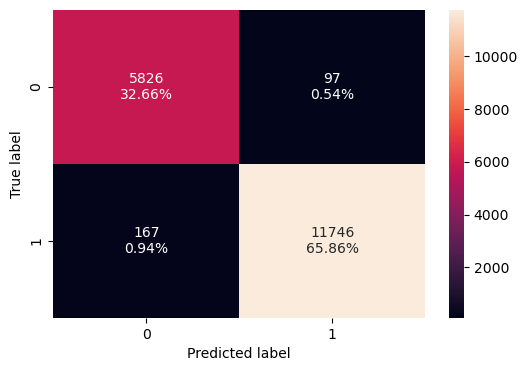

In [718]:
confusion_matrix_sklearn(bagging_classifier,X_train,y_train) 

In [719]:
#Code to check performance on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train) 
print("Training performance:\n")
bagging_classifier_model_train_perf

Training performance:



,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

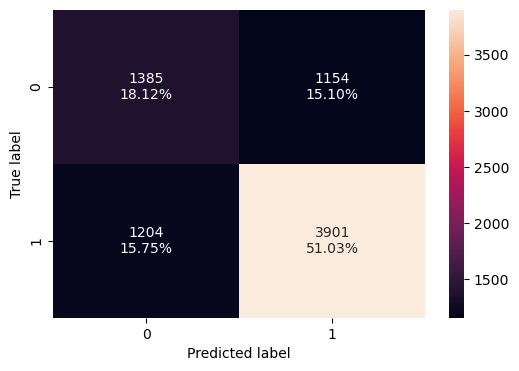

In [720]:
confusion_matrix_sklearn(bagging_classifier,X_test,y_test) 

In [721]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n")
bagging_classifier_model_test_perf


Testing performance:



,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


**Observation**

- *We can see from above results the `model is performing perfectly on training set` i.e. all metric(Accuracy,recall,Precision and f1-score) are `almost 1,` classifying each data points correctly but poorly on test set*
  
- *As observed earlier in default Decision tree there is `huge difference` in performance of model on `training and test set`,suggesting that the model is `suffering from overfiiting`.*
  

### Hyperparameter Tuning - Bagging Classifier

In [722]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned,parameters,scoring=scorer,cv=5,n_jobs=-1) #5-fold cross-validation is used to evaluate each parameter combination
                                                                        #n_jobs=-1: Uses all CPU cores for parallel processing to speed up the search 
                                                                        #Uses F1-score as the metric to evaluate the model.
                                                                        
# Code to fit the grid_obj on the train data 
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_        # Retrieves the best model

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)  


BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

### Checking model performance on training set

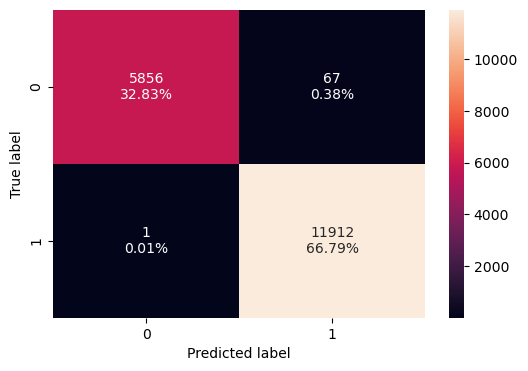

In [723]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train) 

In [724]:
#Code to check performance for train data on bagging tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train) 
print("Training performance:")
bagging_estimator_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


### Checking model performance on Test set

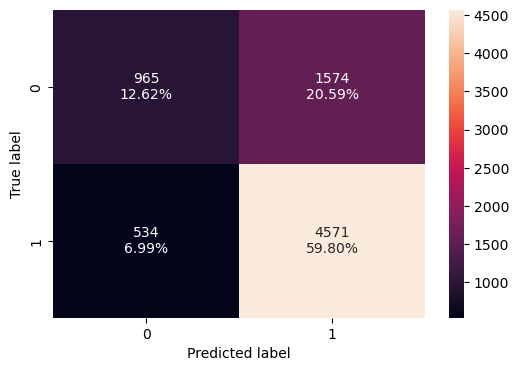

In [725]:
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test) 

In [726]:
## Code to check performance for test data on tuned bagging estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:")
bagging_estimator_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


**Observation**


- *The `hypertuning improve model performance little` but it's still `suffering from overfitting`.*
  
- *While it's doing excellent on training metric almost near to 1 , but performing poorly on test data.*

### Random Forest

In [727]:
rf_default=RandomForestClassifier(random_state=1,class_weight='balanced')
rf_default.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

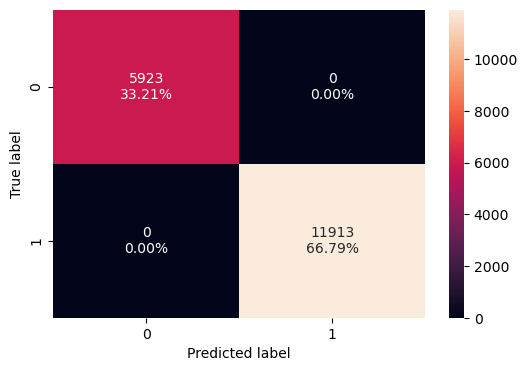

In [728]:
confusion_matrix_sklearn(rf_default,X_train,y_train) 

In [729]:
#Code to check performance for train data on random forrest model
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_default,X_train,y_train) 
print("Training performance:")
rf_estimator_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

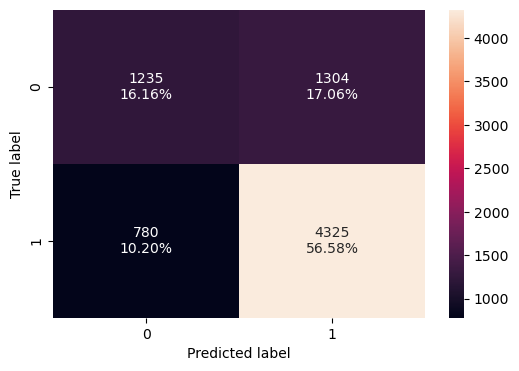

In [730]:
confusion_matrix_sklearn(rf_default,X_test,y_test) 

In [731]:
#Code to check performance for test data on random forrest
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_default,X_test,y_test) 
print("Testing performance:")
rf_estimator_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


**Observation**

- *Again the `model is performing perfectly on training set` i.e. all metric(Accuracy,recall,Precision and f1-score) are `equal to 1,` classifying each data points correctly, but poorly on test set*
  
- *Model is `suffering from overfiiting`and `huge difference` in performance of model on `training and test set`, but `recall and f1-score is better than decision tree model`.*
  

### Hyperparameter Tuning - Random Forest

In [732]:
## Choose the type of classifier.
rf_estimator_tuned=RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

#set the parameter for grid serach
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj=GridSearchCV(rf_estimator_tuned,parameters,scoring=acc_scorer, cv=5, n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj=grid_obj.fit(X_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

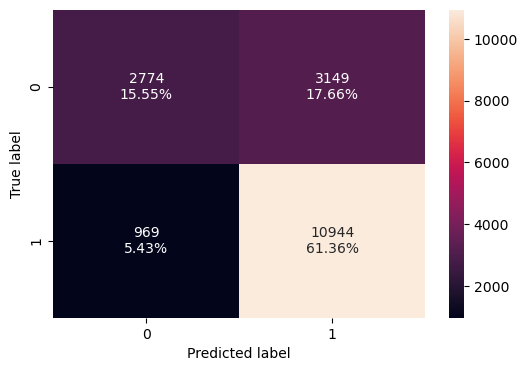

In [733]:
confusion_matrix_sklearn(rf_estimator_tuned,X_train,y_train) 

In [734]:
#Code to check performance for train data on random forrest tuned estimator
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train) 
print("Training performance:")
rf_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


#### Checking model performance on Test set

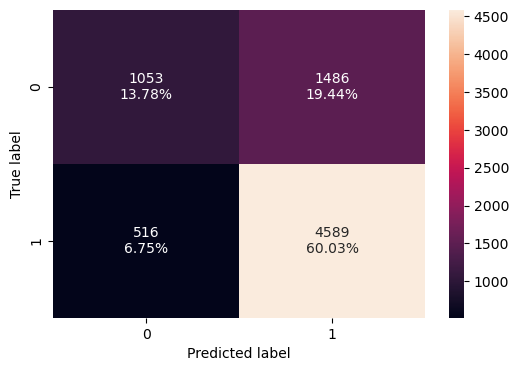

In [735]:
confusion_matrix_sklearn(rf_estimator_tuned,X_test,y_test) 

In [736]:
#Code to check performance for test data on bagging tuned estimator
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_estimator_tuned,X_test,y_test) 
print("Testing performance:")
rf_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


**Observation**

- *We can see an `increase in recall (~.92(train) and ~.89(test)) and f1 score(~.84(train) and ~.82(test)` on both training and test dataset, however the model is `slightly overfitting `and there is some slight difference in performance of train and test data*


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [737]:
## Code to define AdaBoost Classifier with random state = 1
ada_classifier = AdaBoostClassifier(random_state=1) 

# Code to fit AdaBoost Classifier on the train data
ada_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

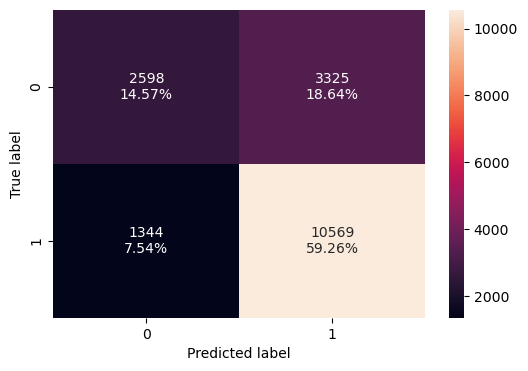

In [738]:
confusion_matrix_sklearn(ada_classifier,X_train,y_train) 

In [739]:
#Code to check performance for train data on bagging tuned estimator
ada_classifier_model_train_perf = model_performance_classification_sklearn(ada_classifier,X_train,y_train) 
print("Training performance:")
ada_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on Test set

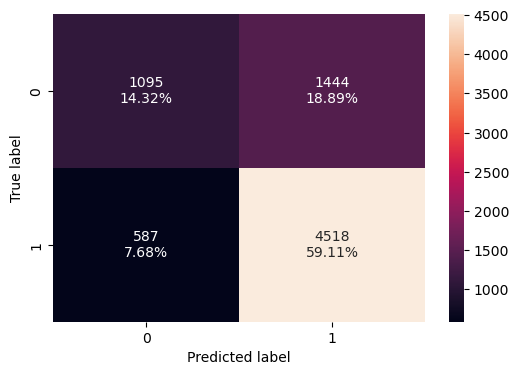

In [740]:
confusion_matrix_sklearn(ada_classifier,X_test,y_test) 

In [741]:
#Code to check performance for test data on bagging tuned estimator
ada_classifier_model_test_perf = model_performance_classification_sklearn(ada_classifier,X_test,y_test) 
print("Testing performance:")
ada_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


**Observation**

- *The model is giving `exacatly same metrics on both training and test set`, suggesting no overfitting.*
- *The `f1 score is ~82` on both training and test set.*


### Hyperparameter Tuning - AdaBoost Classifier

In [742]:
# Choose the type of classifier.
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned,parameters, scoring=acc_scorer,cv=5) ##  run grid search with cv = 5

#Code to fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

#### Checking model performance on training set

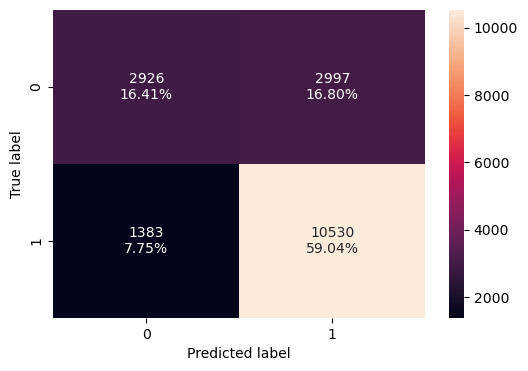

In [743]:
confusion_matrix_sklearn(ada_tuned,X_train,y_train) 

In [744]:
#Code to check performance for train data on bagging tuned estimator
ada_tuned_model_train_perf = model_performance_classification_sklearn(ada_tuned,X_train,y_train) 
print("Training performance:")
ada_tuned_model_train_perf


Training performance:


,Accuracy,Recall,Precision,F1
0,0.754429,0.883908,0.778443,0.82783


#### Checking model performance on Test set

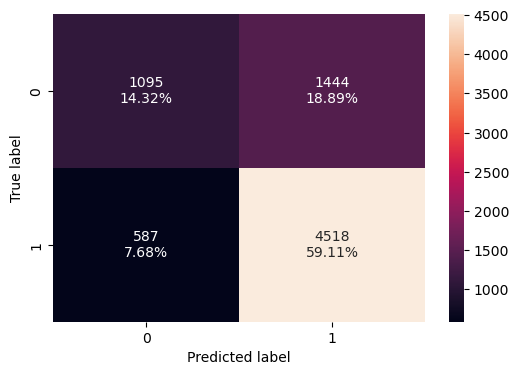

In [745]:
confusion_matrix_sklearn(ada_classifier,X_test,y_test) 

In [746]:
#Code to check performance for test data on bagging tuned estimator
ada_tuned_model_test_perf = model_performance_classification_sklearn(ada_tuned,X_test,y_test) 
print("Testing performance:")
ada_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.741104,0.876004,0.768649,0.818823


**Observation**

- *The model is giving `exacatly same metrics on both training and test set`, suggesting no overfitting.*
- *The `f1 score is ~82` on both training and test set.*

### Gradient Boosting Classifier

In [747]:
## Code to define AdaBoost Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1) 

# Code to fit AdaBoost Classifier on the train data
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

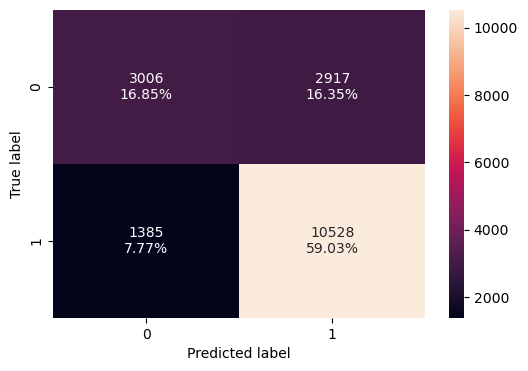

In [748]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train) 

In [749]:
#Code to check performance on  gradient boosting on train data 
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train) 
print("Training performance:")
gb_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Checking model performance on Test set

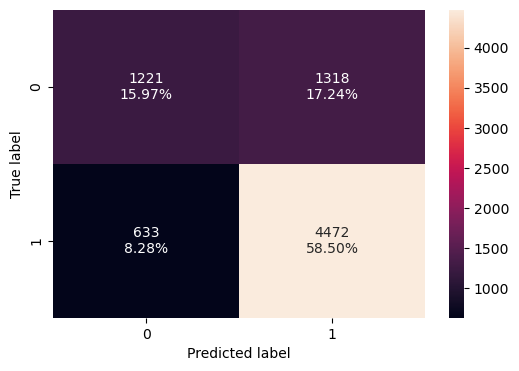

In [750]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test) 

In [751]:
#Code to check performance for test data on gradient boosting 
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) 
print("Testing performance:")
gb_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


**Observation**

- *The model is giving `almost same metrics on both training and test set`.*
- *The `f1 score is ~.83 on training and ~.82(test)` very slight difference.*
- *The precision is ~.78 (train ) and ~.77(test), slightly increase from previous model*

### Hyperparameter Tuning - Gradient Boosting Classifier

In [752]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)       #code to run grid search with cv(cross validation) = 5

#Code to fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=50, random_state=1,
                           subsample=0.9)

#### Checking model performance on training set

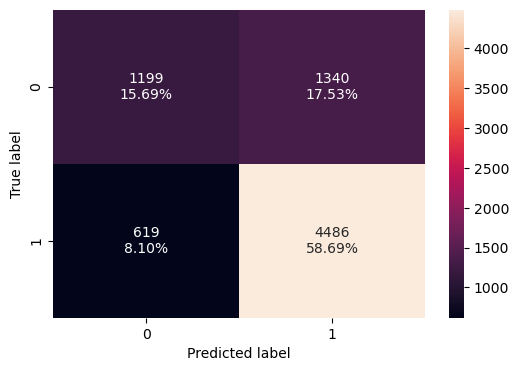

In [753]:
# create confusion matrix for train data
confusion_matrix_sklearn(gbc_tuned,X_test,y_test) 

In [754]:
#Code to check performance for train data on Gradient Boosting tuned estimator
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) 
print("Training performance:")
gbc_tuned_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.756167,0.885251,0.779568,0.829055


#### Checking model performance on Test set

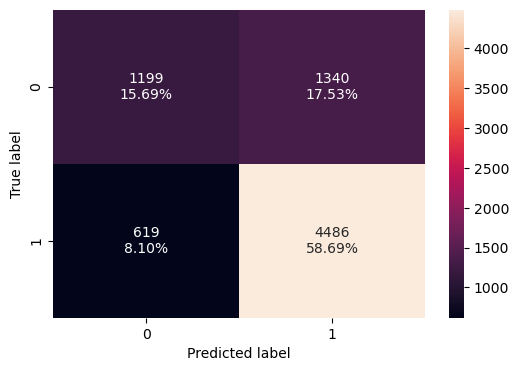

In [755]:
# create confusion matrix for test data
confusion_matrix_sklearn(gbc_tuned,X_test,y_test) 

In [756]:
#Code to check performance for test data on Gradient Boosting tuned estimator
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test) 
print("Testing performance:")
gbc_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.743721,0.878746,0.769997,0.820785


**Observation**

- *All the `metrics remain almost same after  hyper tuning` the model.*
- *The model is `not suffering from overfitting` and  performance are same on train and test set.*
   

### XGBoost Classifier

In [757]:
## Code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')

## Code to fit XGBoost Classifier on the train data
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

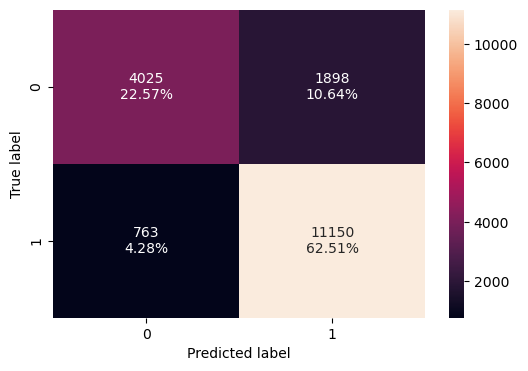

In [758]:
# create confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier,X_train,y_train) 

In [759]:
# Code to check performance on train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train) 
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.850807,0.935952,0.854537,0.893394


#### Checking model performance on test set

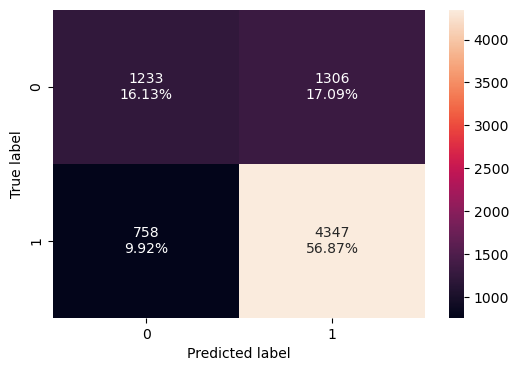

In [760]:
# create confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier,X_test,y_test) 

In [761]:
#Code to check performance for test data on Xg boosting 
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test) 
print("Testing performance:")
xgb_classifier_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.729984,0.851518,0.768972,0.808143


**Observation**
  
- *The model is performing well on train but `poorly on test set, suggesting overfitting`.*
- *All the `metrics has decresed on test` set while increased on train set.*


**Observation**

### Hyperparameter Tuning - XGBoost Classifier

In [762]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)         #Code to run grid search with cv = 5

## Code to fit the grid_obj on train data
grid_obj = grid_obj.fit(X_train,y_train) 

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

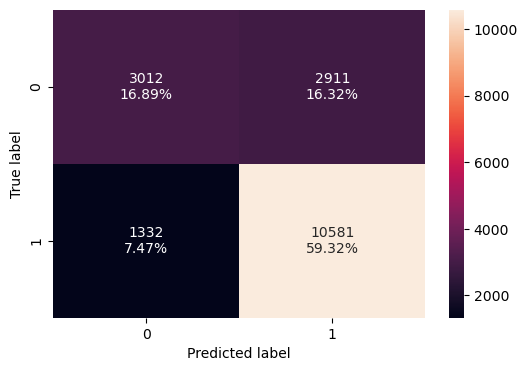

In [763]:
# create confusion matrix for train data
confusion_matrix_sklearn(xgb_tuned,X_train,y_train) 

In [764]:
# Code to check performance on train data
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train) 
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76211,0.888189,0.784243,0.832986


#### Checking model performance on Test set

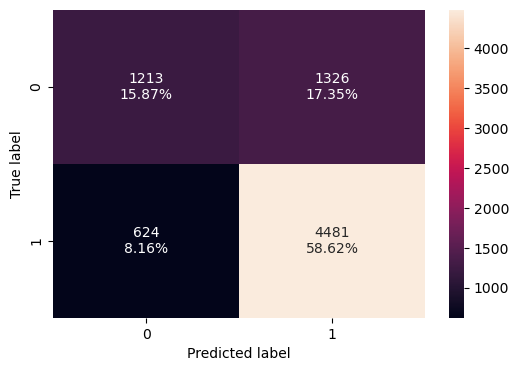

In [765]:
# create confusion matrix for test data
confusion_matrix_sklearn(xgb_tuned,X_test,y_test) 

In [766]:
#Code to check performance for test data on Gradient Boosting tuned estimator
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test) 
print("Testing performance:")
xgb_tuned_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.744898,0.877767,0.771655,0.821298


**Observation**
  
- *The model is performing well on both train and test set with slight very slight difference in metrics values on test and train`.*
- *All the `metrics has increased on both test and train` set but are similar to other good performing previous models..*
  

## Stacking Classifier

In [767]:
estimators = [
    ("AdaBoost", ada_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_estimator_tuned),
]

final_estimator = xgb_tuned
## Complete the code to define Stacking Classifier
stacking_classifier = StackingClassifier(estimators = estimators,final_estimator=final_estimator)

# Complete the code to fit Stacking Classifier on the train data

stacking_classifier.fit(X_train,y_train)



StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))]...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

### Checking model performance on training set

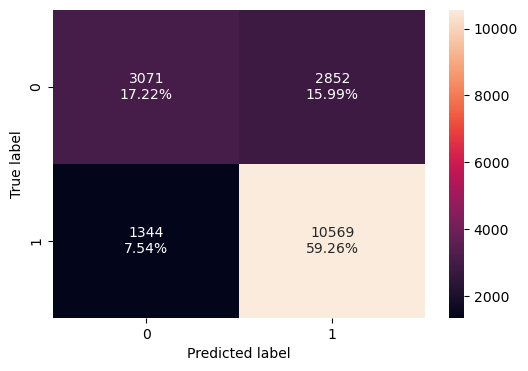

In [768]:
# create confusion matrix for train data
confusion_matrix_sklearn(stacking_classifier,X_train,y_train) 

In [769]:
## Code to check performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train) 
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764745,0.887182,0.787497,0.834373


### Checking model performance on test set

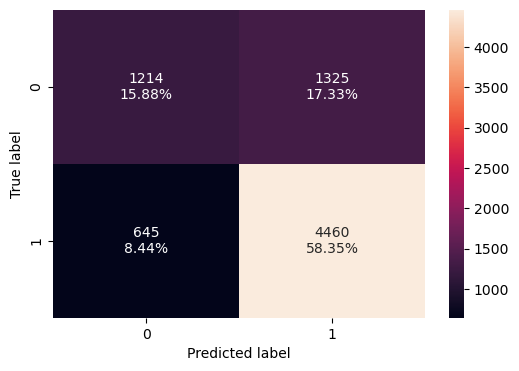

In [770]:
# create confusion matrix for test data
confusion_matrix_sklearn(stacking_classifier,X_test,y_test) 

In [771]:
## Code to check performance for test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test) 
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742282,0.873653,0.770959,0.8191


**Observation**
  
- *The model is `performing well` on train and giving performance `similar to tuned Xgboost`.*
  
- *All the `metrics has decresed on test` slightly, suggesting little overfitting.*

## Model Performance Comparison and Final Model Selection

In [772]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        decision_tree_tune_perf_train.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ada_classifier_model_train_perf.T,
        ada_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df



Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.754429,0.758802,0.756167,0.850807,0.762110,0.764745
Recall,1.0,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.883908,0.883740,0.885251,0.935952,0.888189,0.887182
Precision,1.0,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.778443,0.783042,0.779568,0.854537,0.784243,0.787497
F1,1.0,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.827830,0.830349,0.829055,0.893394,0.832986,0.834373


In [773]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        decision_tree_tune_perf_test.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ada_classifier_model_test_perf.T,
        ada_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.741104,0.744767,0.743721,0.729984,0.744898,0.742282
Recall,0.742801,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.876004,0.876004,0.878746,0.851518,0.877767,0.873653
Precision,0.752232,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.768649,0.772366,0.769997,0.768972,0.771655,0.770959
F1,0.747487,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.818823,0.820927,0.820785,0.808143,0.821298,0.819100


**Observation**

- *The `majority of the models` are giving `similar f1-score (0.80-0.82)`on test data`*.
  
- *`Tuned Decision tree` is giving better model performance with `highest recall (0.93)`, but accuracy and precision is less.*
- *The `bagging classifier is suffering from overfitting` , performing well on the training data.*
- *The `tuned Random forest is giving good performance on Train and test set` , but it's again `slightly` suffering from `overfitting`.*
- *`Gradient booster is giving similar performance on both train and test data` whether it's tuned or not. More generalized performance as compared to the other models*
- *`Tuned Xgbooster` is also giving `similar performance` on Test and train `like gradient booster`, with very `slight overfit`*.
- *`Stacking classifier` is giving good performance but again` suffering from little overfitting` of train data.*

## Comparing top 5 models with high F1 score and recall

In [774]:
# testing performance comparison of best 5 models with high f1 score and recall

diff_models_test_comp_df = pd.concat(
    [
        decision_tree_tune_perf_test.T,
        rf_tuned_model_test_perf.T,
        ada_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_tuned_model_test_perf.T
        
    ],
    axis=1,
)
diff_models_test_comp_df.columns = [
    
    'Tuned Decision Tree',
    'Tuned Random Forest',
    'Adaboost Classifier',
    'Tuned Gradient Boost Classifier',
    'XGBoost Classifier Tuned'
   
]
print("Best Model (Decision and logistic) Test set performance comparison:")
diff_models_test_comp_df

Best Model (Decision and logistic) Test set performance comparison:


,Tuned Decision Tree,Tuned Random Forest,Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.706567,0.738095,0.734301,0.743721,0.744898
Recall,0.930852,0.898923,0.885015,0.878746,0.877767
Precision,0.715447,0.755391,0.757799,0.769997,0.771655
F1,0.809058,0.820930,0.816481,0.820785,0.821298


**Observation**

### Important features of the final 5 model

**Tuned Decision Tree**

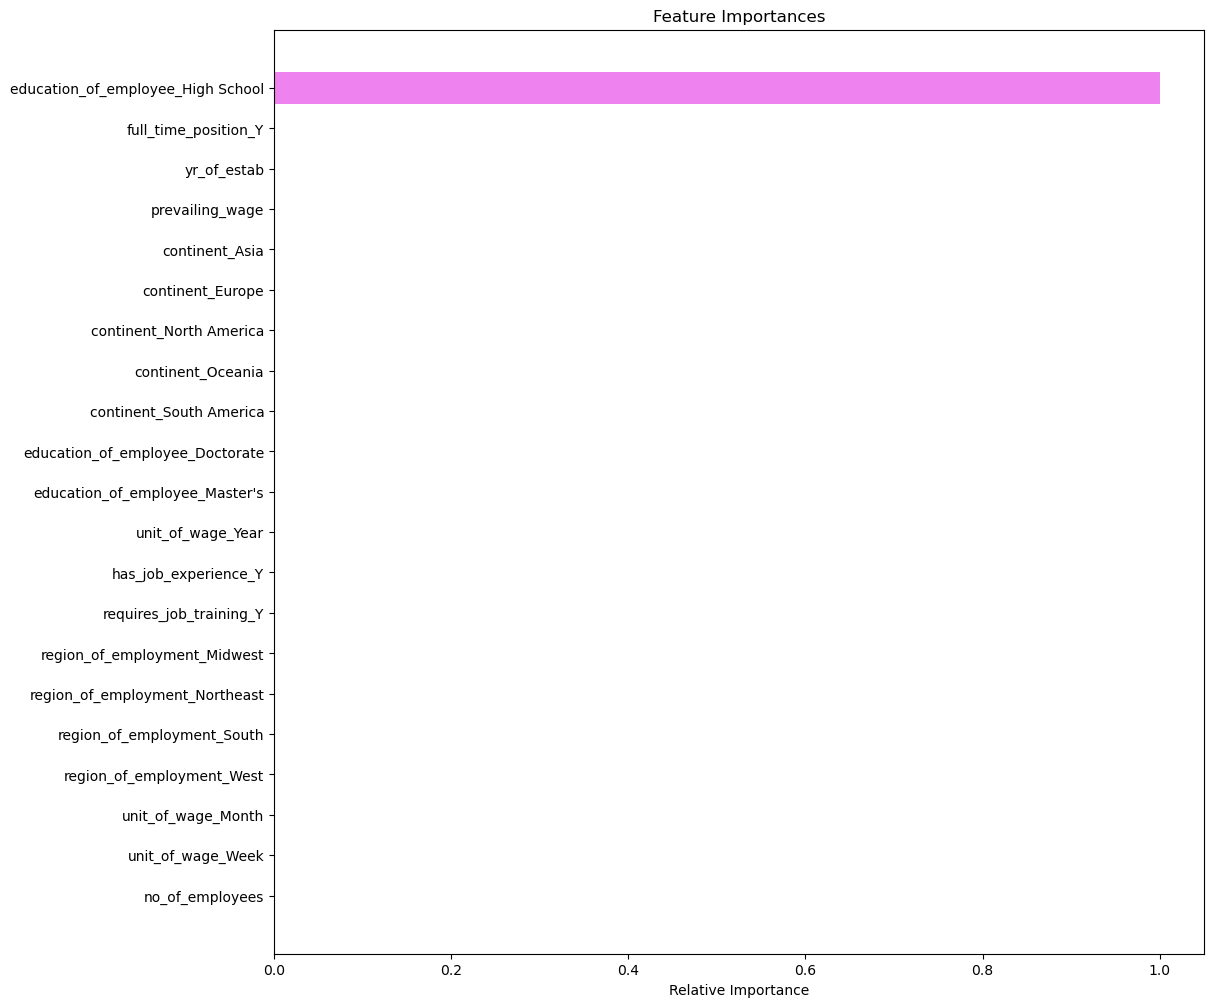

In [775]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [776]:
# Text report showing the rules of a tuned decision tree -
print(tree.export_text(dtree_estimator, feature_names=feature_names, show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- weights: [6498.41, 8310.89] class: 1
|--- education_of_employee_High School >  0.50
|   |--- weights: [2419.59, 607.11] class: 0



**Observation**

- *`education_of_employee_High School` is the `only and most` important feature in identifying visa case approval in `tuned decision tree`.*
  
- *If `education_of_employee_High School <= 0.50 `(i.e., employee's education is` NOT High School`, but higher degree like Bachelor's, Master's, or Doctorate), then Predicted case will be certified `(Class: 1 (Certified))`.*

**Tuned Random Forrest**

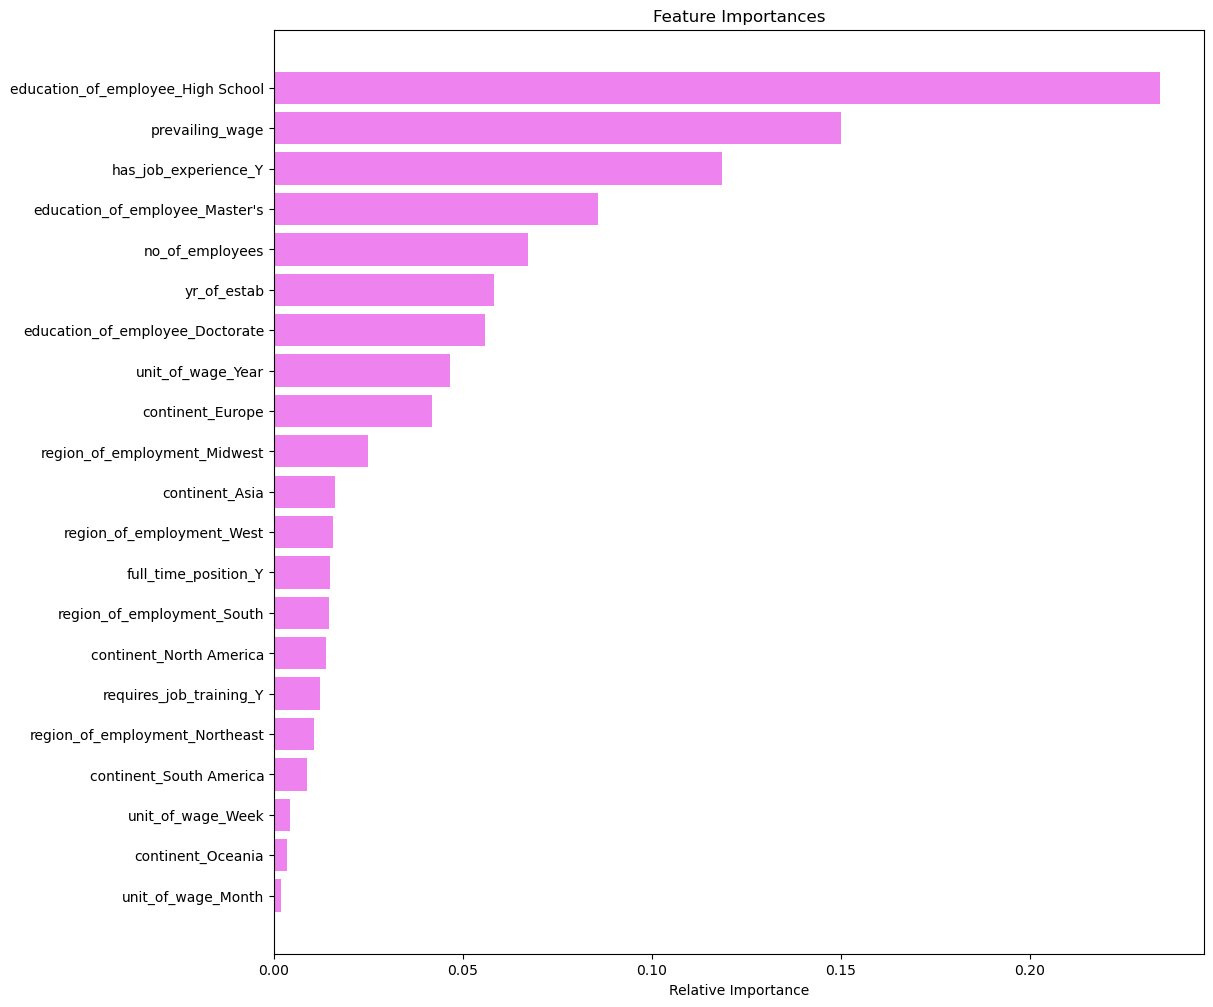

In [777]:
feature_names = X_train.columns
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Ada booster classifier**

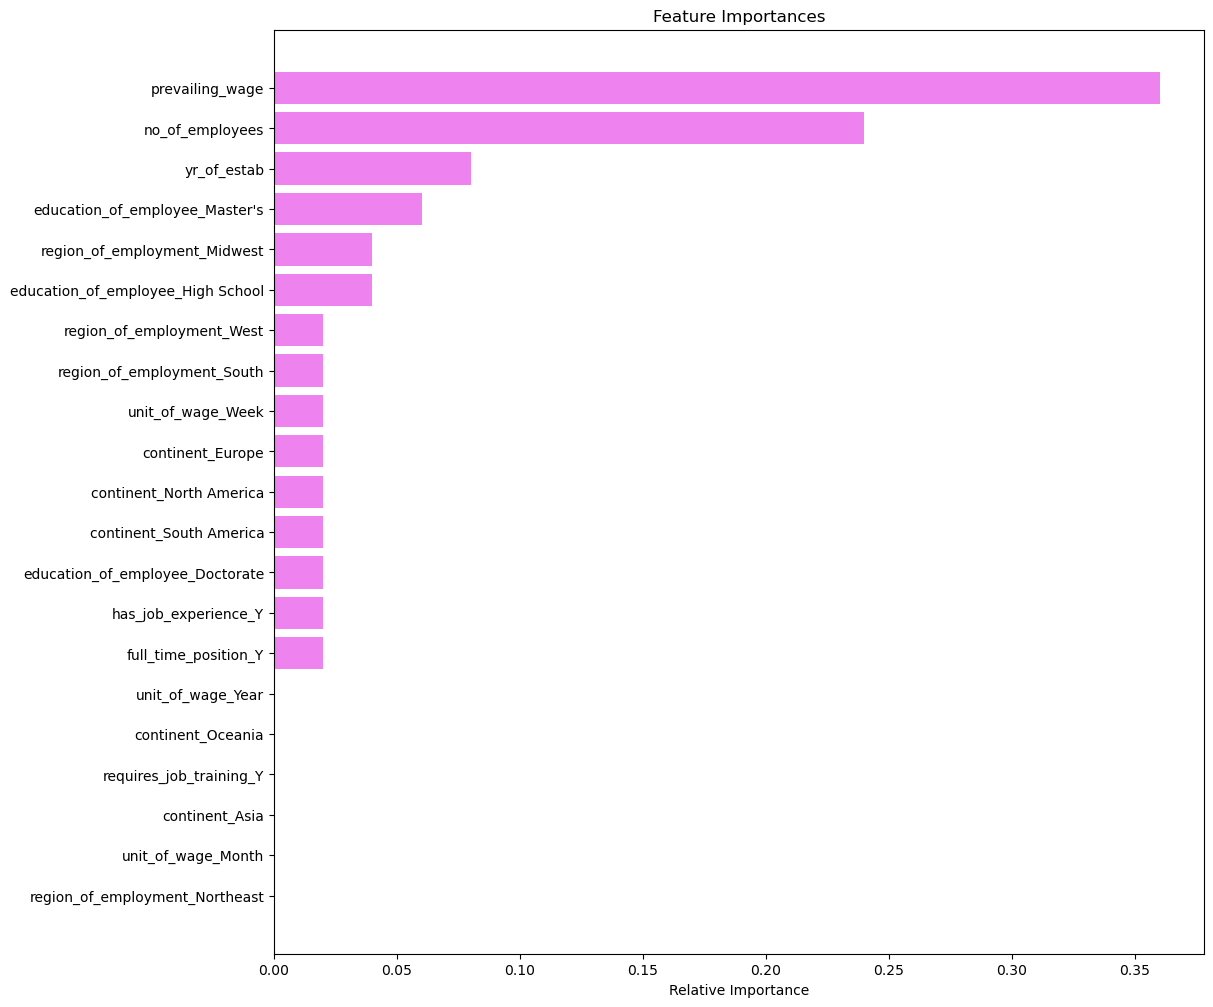

In [778]:
feature_names = X_train.columns
importances = ada_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Gradient Booster**

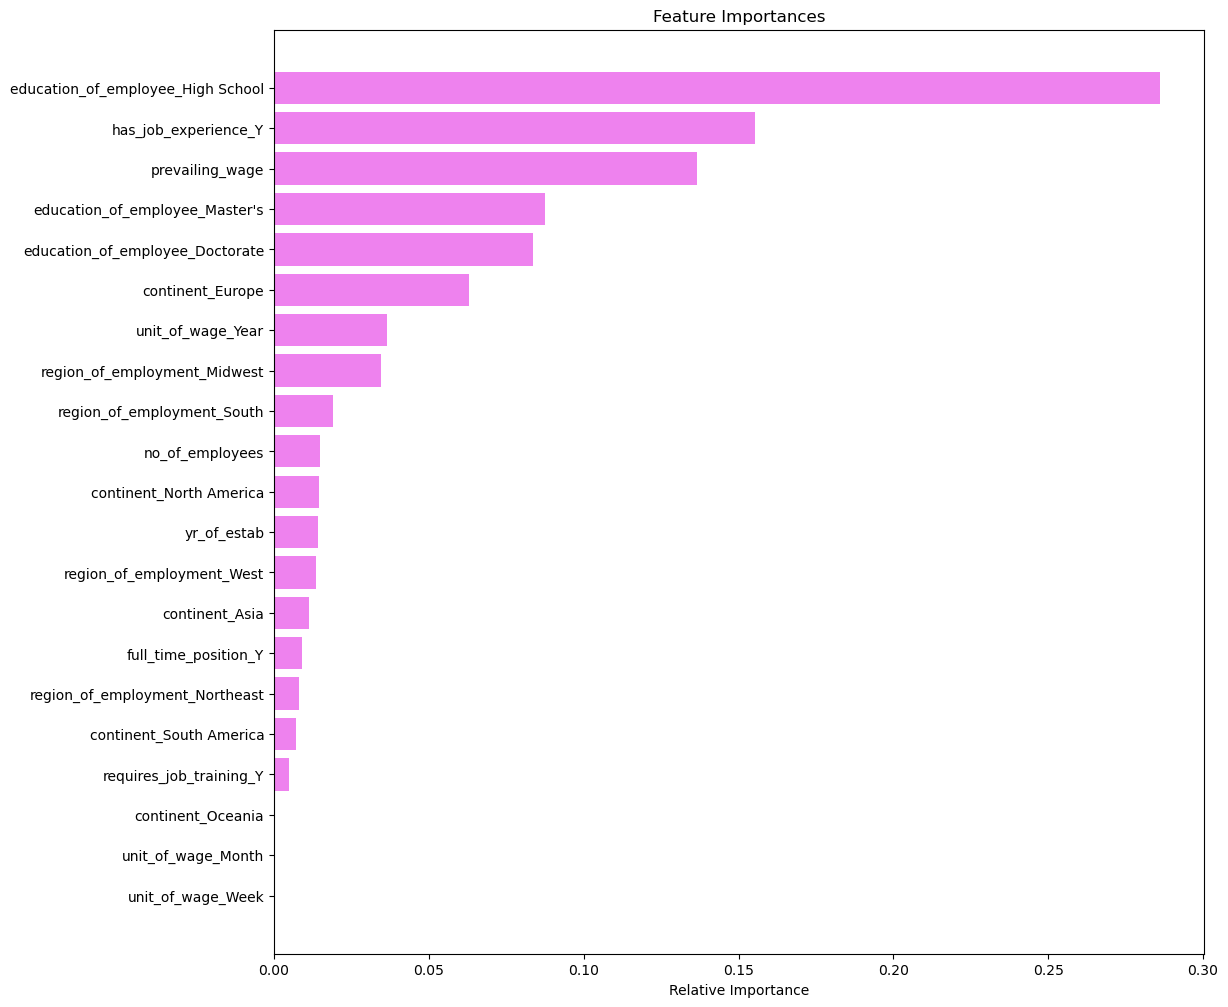

In [779]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Xgb tuned booster**

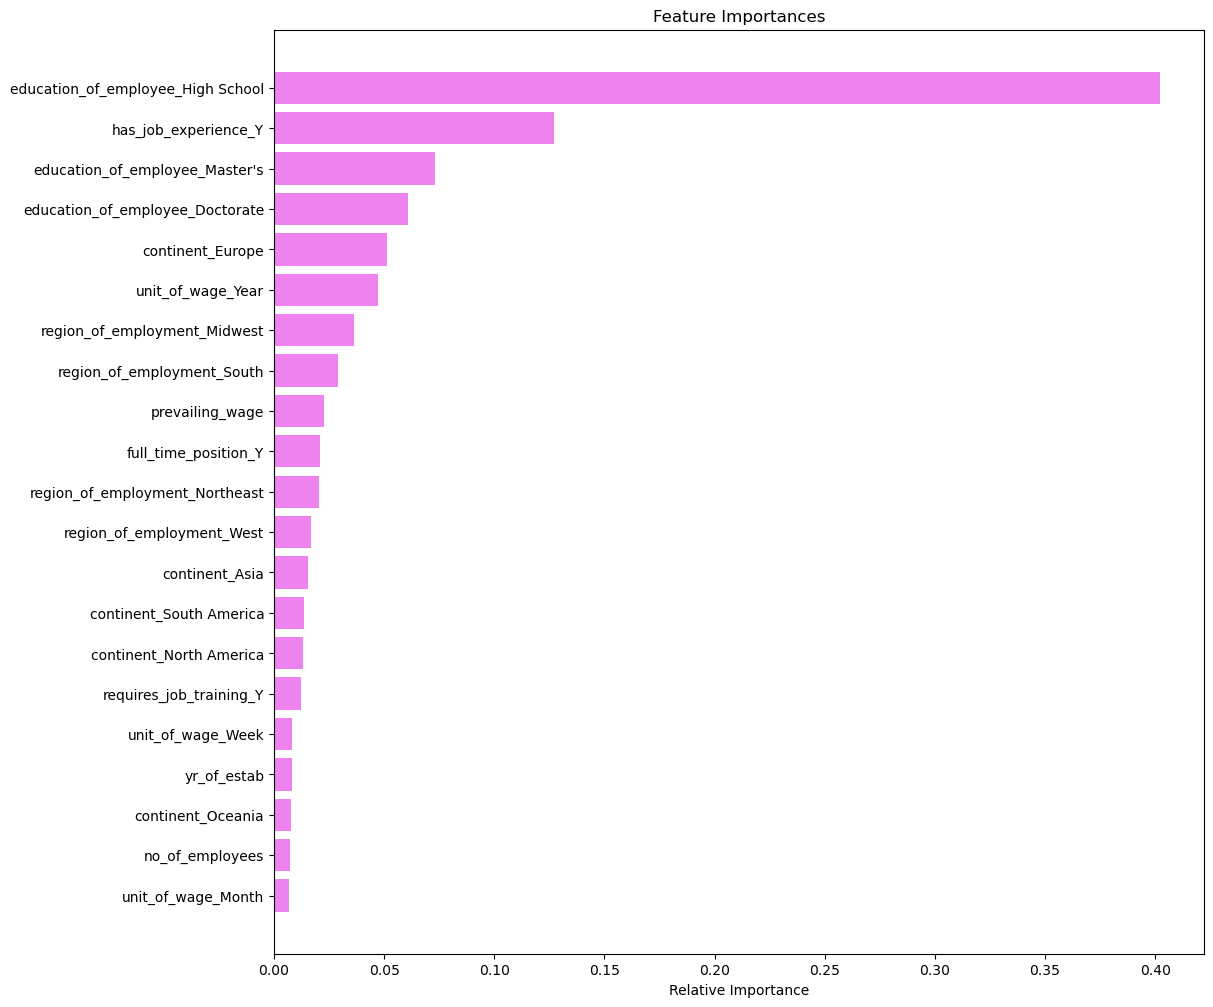

In [780]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

- *`education_of_employee_High School` is the `most` important feature in identifying visa case approval in almost all the final 5 model except Ada booster classifier`.*
- *Other important features are `has job experiences` and `prevailing wage`.*

##  Will tuning the hyperparameters improve the model performance?

- *`Yes Tuning has significant effect on improvement of model performance `on train and test data and reducing overfitting of data.*
- *We have seen in our top 5 models `overfitting of data and metrics have greatly improved `in most of the models.*
- *Hypertuning has less or no effect in boosting classifier(Ada booster and gradient booster), we can see similar performance with or without tuning on test and train set.*

## Final Model Summary

**Observation**

- *We have created `13 models with and without hypertuning` and selected final 5 best models based on the performance on test and train set.*
- *The `majority of the these models` are giving `similar f1-score (0.80-0.82)`on test data`*.
  
- *`education_of_employee_High School` is the `most important feature `in predicting visa case approval in almost all the final 5 model except `Ada booster classifier`. Other important features are `has job experiences` and `prevailing wage`.*
  
- *Both `Gradient booster and Tuned Xgbooster` are giving similar and generalized performance as compared to the other models on both train and test data` and can be selected as best models.*
  
- *`Xgbooster is a good choice` if dealing with `large datasets` as they provide `high optimization` (fastest/parallel processing/efficient memory usage ), hyper tuning provide `stability across different datasets `by optimizing key parameters like learning rate, depth, and regularization, and `scalability` (i.e. its ability to handle increasing amounts of data or computational load efficiently without a significant drop in performance.) and ability to `handle missing values efficiently`.*
  
- *`Gradient booster will be good choice` if dealing with medium dataset and goal is to build a `simpler model` and when `computational efficiency `is `less of a concern`, as it builds models sequentially, learning from previous errors.*
  
- *`Comparing the different metric (Accuracy,Recall,Precision and F1 score)`, the `Tuned Xgbooster`is giving generalized performance and provide high optimization,scalibility, stability and it's ability to handles missing values automatically.*
- *Therefore we will choose the `Tuned Xgbooster` as our **`final best model`** with `f1-score (~0.82) `and `recall(~0.88)` on test set.*
  

## Actionable Insights and Recommendations

**Insight:**

The Office of Foreign Labor Certification `(OFLC)` processes job certification applications for employers seeking to bring foreign workers into the United States. Certifications are granted based on the unavailability of U.S. workers with the required skill set in a specific location.

With the `increasing demand for visa applications `each year, OFLC is seeking a `Machine Learning-based solution` to help shortlist candidates with a higher likelihood of visa approval. To address this challenge, they have `hired EasyVisa , consulting firm `to develop a data-driven approach for improving the decision-making process.
The `dataset` we have analyzed here consist of `approx 26k visa applications details of the employees`. They contains details  about employees `educations, job experiences, continent` of origin. Do they` require any job training` ? is the applications is for `full-time `or contract based position? details about `prevailing wages` and the units and `job locations` in USA . It aslo contains details about `employers company size(`i.e. number of employees ) and year it's established.

The main idea here is to analyze the data provided to find which factors have a high influence in predicting the `visa application outcomes` and `recommend` a `suitable profile` for the applicants for whom the visa should be `certified or denied` based on these key drivers that significantly influence the case status.

We performed `Exploratory Data Analysis (EDA)` and `Data Preprocessing`, followed by building `multiple classification models with Ensemble techniques `using `Decision Trees, Bagging (Random Forest), and Boosting (AdaBoost, Gradient Boosting, XGBoost, and Stacking)`, with and without `hyperparameter tuning`. Our goal was to recommend suitable applicant profiles for visa certification or denial and identify key factors influencing the decision.

**Below are the conclusions and recommendation from our analysis**.


*From the `sample dataset of EasyVisa` and the `final model built`, we were able to `conclude that`,*

- *The model built can predict whether a visa application will be certified or not. It `identify ~88.0% of visa approval(i.e. identifying those who should be certified) (recall). f1 score of .82 means `it's relatively strong in both identifying visa approval correctly and avoiding too many false positives(i.e balance between recall and precision)*
  
- *features like `education_of_employee_High School` `has job experiences` and `prevailing wage` are the `most important feature `in predicting visa case approval in almost all the models, suggesting employees with higher education(master/bachelors/doctorate), job experiences and prevailing wage are more likely to be certified by the model*.

- *`Cases approval is highest when unit of wage is yearly,` indicating requirements are high for skilled workers for full-time positions or salaried workers and employers willingness to pay competitive salaries*.
- *Around `22962 applications` are filed for prevailing wage `measured in Year`, acounting for `90 % of application`.*
  
- *`Denial is highest` for `hourly paid `workers, indicating temporary, contract based jobs or seasonal workers.*
- *There are 4 different categories `(Bachelor's , Master's , High School, Doctorate)` in employees educations.*
  
- *Most of the applications filed are for the employees who `hold Bachelor's degree(40 %) followed by Master's(38%)`, contributing approx 80% of applications.Other two( High School, Doctorate) contributes 20% of applications*.
- *`82% of applications` are from `Northeast (28%), South (27.5 %) and West(26 %) region` , suggesting higher job opportunities are present in this region.*
- *Most of the visa applications are filed from Asia(66 %), followed by Europe(15 %) and North America(13 %).*

- *`74 percent` of cases are `approved for employees having prior work experienced `while for `non-experienced `employee the approval rating is `only 56 %` .*
- *`Approval rate` for `all education degree` are `high(more than 80 %)` for `Europe` except for High school.*

- *Approval rates for `High schools graduate are more in Oceania,South & North America`  as compared to other 3 continents, suggesting applications for low skilled jobs.*

- *`74 percent` of cases are `approved for the employees having prior work experienced `whereas the approval rating is `only 56 %` for `non-experienced `employees*

#### **Recommendations**

- *The Office of Foreign Labor Certification `(OFLC)` can implement the model as part of the visa application review process to assist the decision-makers in shortlisting applicants.* 

- *We have noticed that `employees educations,experiences and prevailing wage are the important features `and applicants with strong educational backgrounds, relevant job experience, and a competitive prevailing wage should be prioritized in decision making*.
  
- *With `changes in policies and rules`, the model need to be `updated periodically `to maintain `accuracy`in data.*

- *Regularly analyze the model for any potential bias, `to ensure fairness and non-discrimination in visa making decision based` on demographics/education or nationality etc.*

- *EasyVisa should `gather feedback `from real world on model performaces, work with with representatives/hiring managers across US regions to have a clear understanding on skilled worker demands.*
  